# Data Processing

## DATA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect


In [ ]:
data.shape

(1025, 14)

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


## **1. Data Preparation**
Peserta dapat memilih dataset yang telah disediakan. Siapkan data berdasarkan langkah berikut:

### **Missing value**
Mencari missing value dan mengatasi masalah missing value jika ada.



In [ ]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### **Duplicate value:**
Mencari duplicate value dan menyelesaikan masalah duplicate value jika ada.


In [ ]:
jumlah_duplikat = data.duplicated().sum()
print ("Jumlah duplikat dalam data sebesar ", jumlah_duplikat, "baris")

Jumlah duplikat dalam data sebesar  723 baris


In [ ]:
handling_duplicate = data.drop_duplicates()
handling_duplicate_value = handling_duplicate.duplicated().sum()
data1=handling_duplicate
print("Banyaknya duplikat setelah di handling sebesar", handling_duplicate_value)

Banyaknya duplikat setelah di handling sebesar 0


In [ ]:
# Mengembalikan nilai index
data1 = data1.reset_index(drop=True)

### **Outlier:**
Memeriksa outlier dan menangani outlier jika ada.

### Outlier Multivariate

In [ ]:
print('UNIQUE VALUES\n')
for col in data1.columns:
    print(f'{col}: {len(data1[col].unique())}\n')

UNIQUE VALUES

age: 41

sex: 2

cp: 4

trestbps: 49

chol: 152

fbs: 2

restecg: 3

thalach: 91

exang: 2

oldpeak: 40

slope: 3

ca: 5

thal: 4

target: 2



Memilih kolom yang bukan bersifat kategori.

In [ ]:
outlier = data1.drop(['sex', 'fbs', 'restecg', 'exang', 'target'], axis=1)

- Extrime Outlier = Q1 - 3 * IQR atau Q1 + 3 * IQR
- IQR = Q3 - Q1

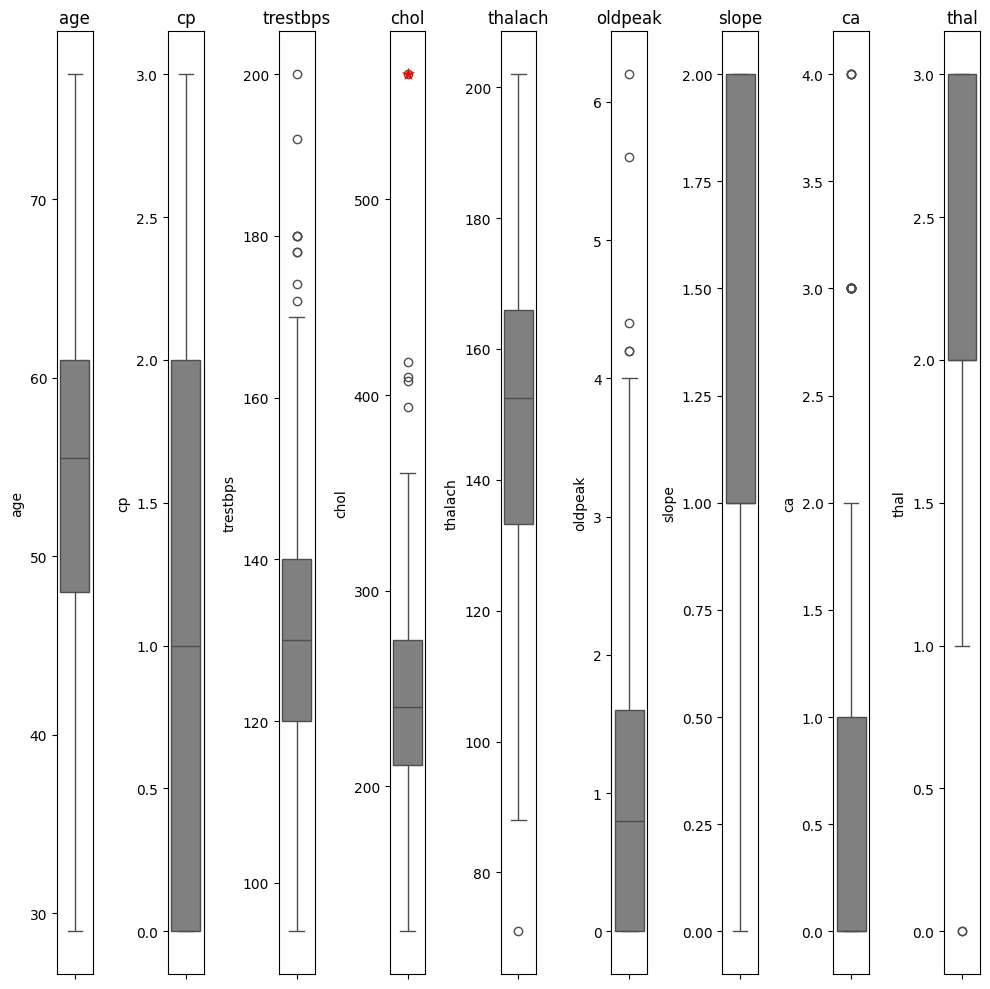

In [ ]:
# Fungsi untuk mendeteksi ekstrim outlier menggunakan IQR
def detect_extreme_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    extreme_outliers = (data < lower_bound) | (data > upper_bound)
    return extreme_outliers

# Mendeteksi ekstrim outlier untuk setiap kolom dalam outlier
extreme_outliers_iqr = outlier.apply(detect_extreme_outliers_iqr)

# Plot boxplot untuk setiap kolom dengan penanda ekstrim outlier menggunakan IQR
plt.figure(figsize=(10, 10))
for column in outlier.columns:
    plt.subplot(1, outlier.shape[1], list(outlier.columns).index(column) + 1)
    sns.boxplot(y=outlier[column], color='grey')
    sns.swarmplot(y=outlier[column][extreme_outliers_iqr[column]], color='red', size=10, marker='*')  # menambahkan marker='*'
    plt.title(column)
plt.tight_layout()
plt.show()

Bintang berwarna merah merupakan extrime outlier.

In [ ]:
data1.chol.describe()

count    302.000000
mean     246.500000
std       51.753489
min      126.000000
25%      211.000000
50%      240.500000
75%      274.750000
max      564.000000
Name: chol, dtype: float64

In [ ]:
data_chol = data1['chol']
q1 = data_chol.quantile(0.25)
q3 = data_chol.quantile(0.75)
IQR = q3 - q1
lower = q1 - (3 * IQR)
upper = q3 + (3 * IQR)
extreme_chol = (data_chol < lower) | (data_chol > upper)
total_extreme_chol = extreme_chol.sum()
print("Banyaknya extrime outlier sebesar", total_extreme_chol)

Banyaknya extrime outlier sebesar 1


In [ ]:
df = data1[(data1['chol'] < lower) | (data1['chol'] > upper)]
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
128,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


<Axes: xlabel='chol', ylabel='Count'>

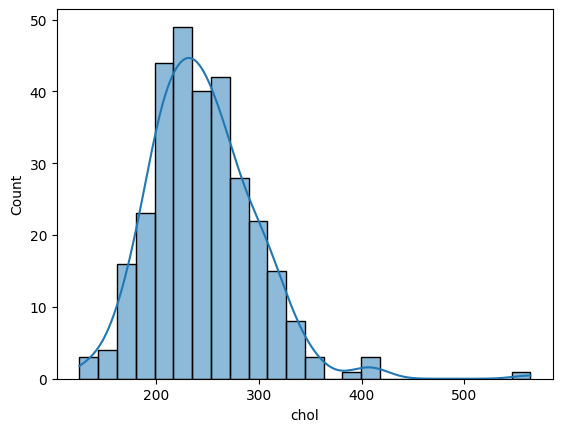

In [ ]:
sns.histplot(data1['chol'],kde=True)

<Axes: xlabel='chol', ylabel='Count'>

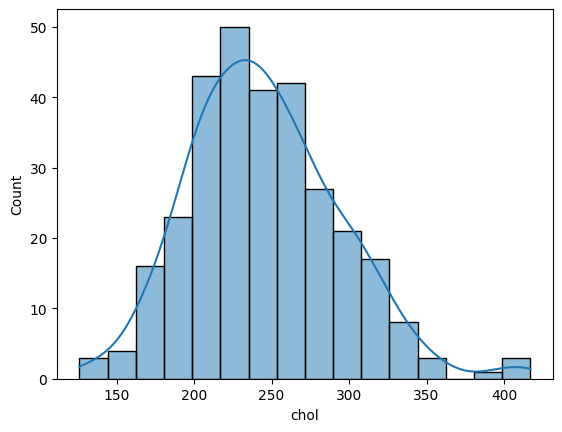

In [ ]:
data_cleaning = data1.copy()  # Membuat variabel baru
data_cleaning.loc[data_cleaning['chol'] > upper, 'chol'] = data_cleaning['chol'].median()
data_cleaning.loc[data_cleaning['chol'] < lower, 'chol'] = data_cleaning['chol'].median()
sns.histplot(data_cleaning['chol'],kde=True)


### **Imbalance data:**
Memeriksa imbalance data dan menyelesaikan masalah imbalance data jika ada.

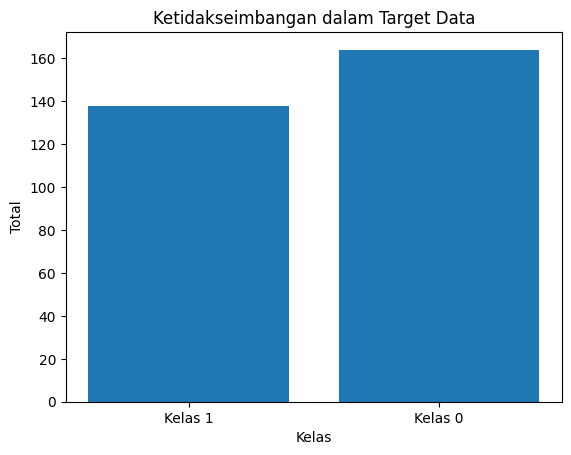

In [ ]:
class_counts = data_cleaning['target'].value_counts()

# Plot bar plot
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Kelas')
plt.ylabel('Total')
plt.title('Ketidakseimbangan dalam Target Data')
plt.xticks(class_counts.index, ['Kelas 0', 'Kelas 1'])
plt.show()

In [ ]:
class_counts = data_cleaning['target'].value_counts()
print("Jumlah sampel dalam setiap kelas:")
print(class_counts)

percentage = class_counts / class_counts.sum()
percentage = round(percentage, 2)
print("Persentase kelas:")
print(percentage)

Jumlah sampel dalam setiap kelas:
target
1    164
0    138
Name: count, dtype: int64
Persentase kelas:
target
1    0.54
0    0.46
Name: count, dtype: float64


### **Feature encoding:**
Melakukan feature encoding jika diperlukan.

In [ ]:
data_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    float64
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 33.2 KB


In [ ]:
data_cleaning.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212.0,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203.0,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174.0,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203.0,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294.0,1,1,106,0,1.9,1,3,2,0


## 2. **Exploratory Data Analysis (EDA)**
Menggunakan dataset yang sama, Peserta diminta untuk:



### Mengelaborasi features dan tipe data (nominal, ordinal, numerical)


1. Nominal : Merupakan tipe data nilai yang besifat perbedaan dan tidak memiliki tingkatan tertentu(misalnya:gender)
2. Ordinal : Merupakan tipe data nilai yang memiliki tingkatan tertentu(misalnya:rating)
3. Numerical : Merupakan tipe data yang mengandung nilai numerik yang dapat dinyatakan sebagai angka(misalnya : nilai siswa)


In [ ]:
print('UNIQUE VALUES\n')
for col in data1.columns:
    unique_values_count = len(data1[col].unique())
    if unique_values_count > 5:
        print(f'Data Numerical - Column: {col}\n')
        print(data1[col].unique())
    elif 2 < unique_values_count <= 5:
        print(f'Data Ordinal - Column: {col}\n')
        print(data1[col].unique())
    else:
        print(f'Data Nominal - Column: {col}\n')
        print(data1[col].unique())


UNIQUE VALUES

Data Numerical - Column: age

[52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
Data Nominal - Column: sex

[1 0]
Data Ordinal - Column: cp

[0 1 2 3]
Data Numerical - Column: trestbps

[125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
Data Numerical - Column: chol

[212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 2

In [ ]:
data_ordinal = data_cleaning[['cp', 'restecg', 'slope', 'ca', 'thal']]
data_nominal = data_cleaning[['sex', 'fbs', 'exang', 'target']]
data_numerical = data_cleaning[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]

In [ ]:
data_numerical.head(), data_ordinal.head(), data_numerical.head()

(   age  trestbps   chol  thalach  oldpeak
 0   52       125  212.0      168      1.0
 1   53       140  203.0      155      3.1
 2   70       145  174.0      125      2.6
 3   61       148  203.0      161      0.0
 4   62       138  294.0      106      1.9,
    cp  restecg  slope  ca  thal
 0   0        1      2   2     3
 1   0        0      0   0     3
 2   0        1      0   0     3
 3   0        1      2   1     3
 4   0        1      1   3     2,
    age  trestbps   chol  thalach  oldpeak
 0   52       125  212.0      168      1.0
 1   53       140  203.0      155      3.1
 2   70       145  174.0      125      2.6
 3   61       148  203.0      161      0.0
 4   62       138  294.0      106      1.9)

### Menjelaskan kondisi dan perbedaan penggunaan mean, median, dan modus


In [ ]:
data_numerical.mean()

age          54.420530
trestbps    131.602649
chol        245.428808
thalach     149.569536
oldpeak       1.043046
dtype: float64

In [ ]:
data_numerical.median()

age          55.50
trestbps    130.00
chol        240.25
thalach     152.50
oldpeak       0.80
dtype: float64

In [ ]:
#Modus di setiap variabel oradinal
data_ordinal.mode()

,cp,restecg,slope,ca,thal
0,0,1,2,0,2


In [ ]:
#Modus di setiap variabel nominal
data_nominal.mode()

,sex,fbs,exang,target
0,1,0,0,1


### Menemukan dan mendeskripsikan statistical five summaries


In [ ]:
data_cleaning.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,245.428808,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,48.399250,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.250000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,417.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Mendeskripsikan distribusi data

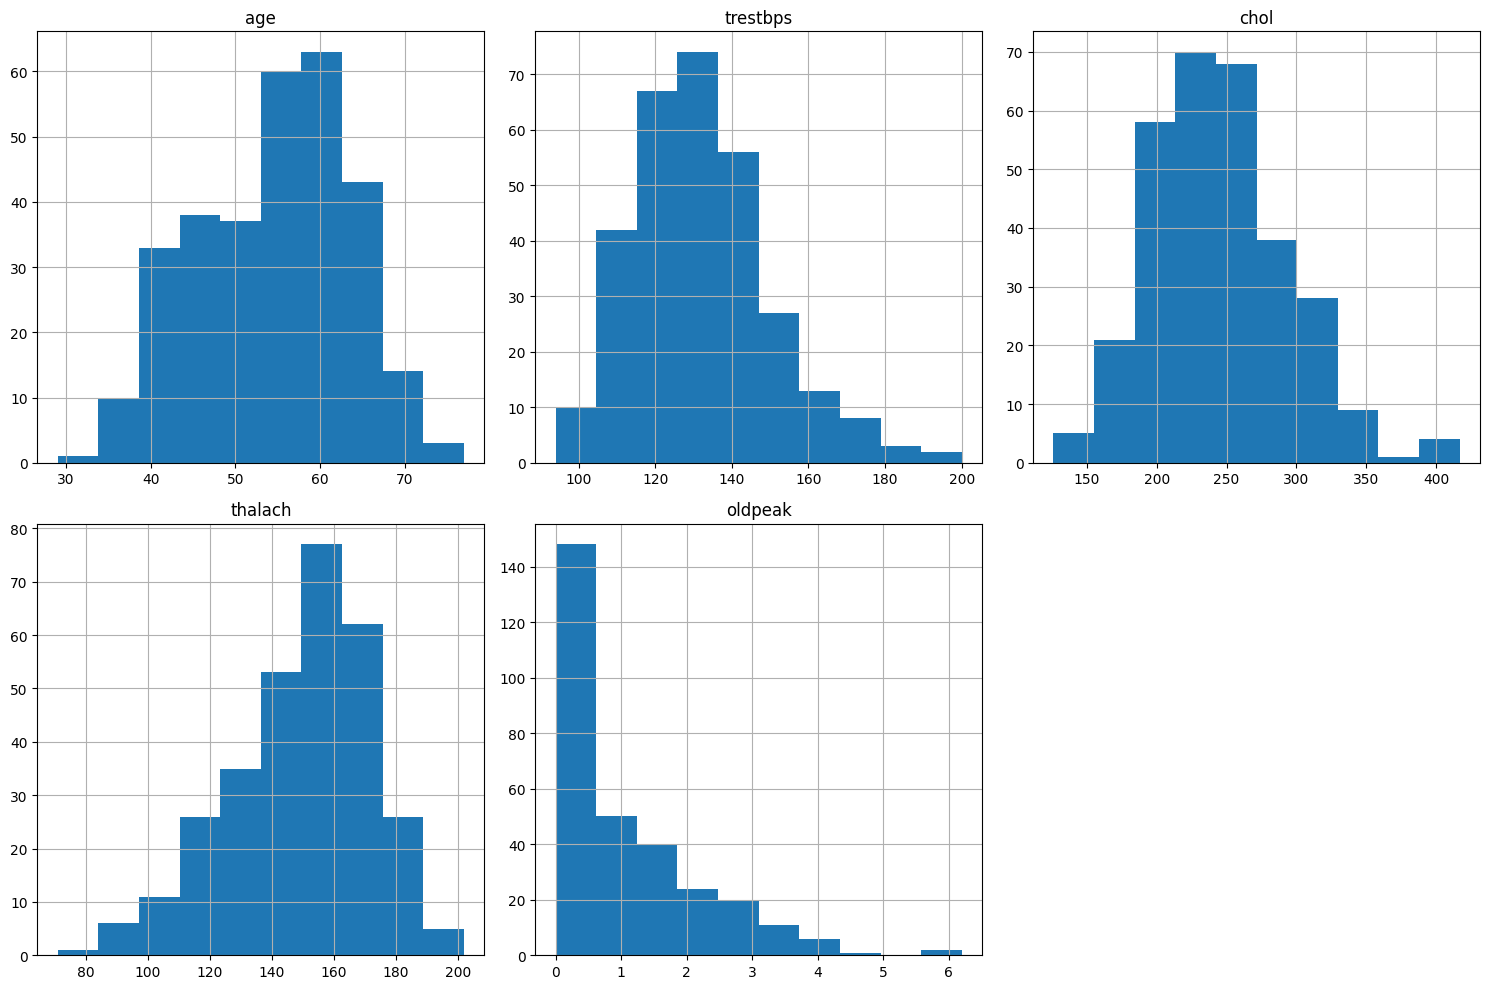

In [ ]:
num_cols = 3  # Jumlah kolom histogram dalam satu baris
num_rows = (len(data_numerical.columns) + num_cols - 1) // num_cols  # Jumlah baris histogram

# Membuat histogram dengan tata letak yang ditentukan
data_numerical.hist(layout=(num_rows, num_cols), figsize=(15, 10))
plt.tight_layout()  # Menyesuaikan tata letak agar tidak tumpang tindih
plt.show()

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

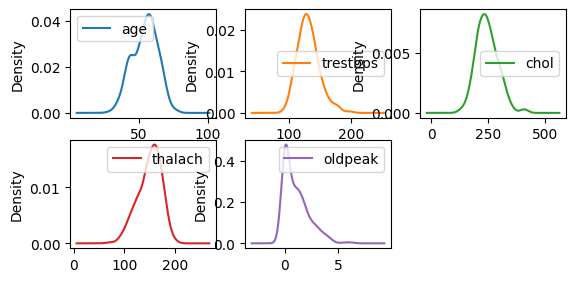

In [ ]:
data_numerical.plot(kind ='density',subplots = True, layout =(3,3),sharex = False)

## 3. Feature Engineering
Menggunakan dataset yang sama, Peserta diminta untuk dapat membuat minimal 10 fitur baru yang relevan dan signifikan untuk dapat membantu membantu bisnis ecommerce dalam menghadapi tantangan bisnis yang ada.
Masalah/objective yang ingin diselesaikan/dicapai diserahkan kepada Peserta untuk dapat mencari permasalahan yang menurut Peserta paling penting.

In [ ]:
data_cleaning.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212.0,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203.0,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174.0,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203.0,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294.0,1,1,106,0,1.9,1,3,2,0


- usia
- jenis kelamin
- jenis nyeri dada (4 nilai)
- tekanan darah istirahat
- kolestoral serum dalam mg/dl
- gula darah puasa > 120 mg/dl
- hasil elektrokardiografi istirahat (nilai 0,1,2)
- detak jantung maksimum yang dicapai
- angina yang disebabkan oleh olahraga
- oldpeak = depresi ST yang diinduksi oleh olahraga relatif terhadap istirahat
- kemiringan segmen ST latihan puncak
- jumlah pembuluh darah utama (0-3) yang diwarnai dengan flourosopi
- thal: 0 = normal; 1 = cacat tetap; 2 = cacat yang dapat dibalik


### Fitur 1 (Serangan Jantung Berdasarkan Usia)

- Usia muda = Di bawah 35 tahun
- Usia menengah = Antara usia 35-50 tahun
- Usia tua = Di atas usia 50 tahun

In [ ]:
filter_target = data_cleaning[data_cleaning["target"] ==1 ]

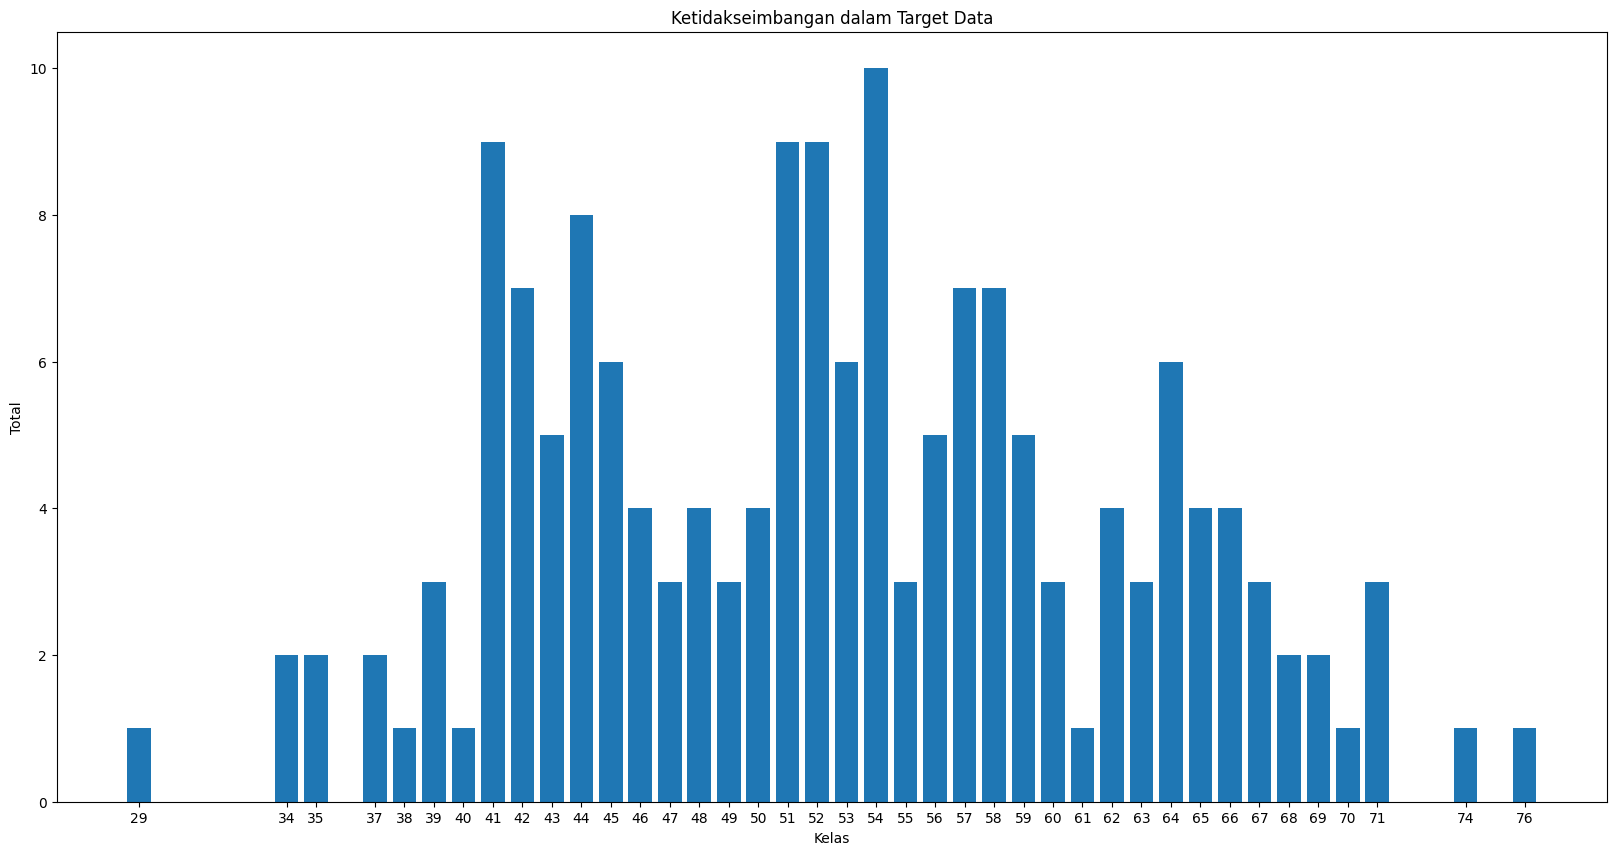

In [ ]:
plt.figure(figsize=(20, 10))
class_counts = filter_target['age'].value_counts()

# Plot bar plot
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Kelas')
plt.ylabel('Total')
plt.title('Ketidakseimbangan dalam Target Data')
plt.xticks(class_counts.index)
plt.show()

In [ ]:
# Fungsi untuk menentukan status berdasarkan nilai trestbps
def status_usia(usia):
    if usia <= 35:
        return 'Dewasa Muda'
    elif 35< usia <= 50:
        return 'Dewasa Lanjut'
    else:
        return 'Lansia'

# Mendefinisikan kolom 'Status BMI' dengan menerapkan fungsi status
data_cleaning['Status Usia'] = data_cleaning['age'].apply(status_usia)
usia_sampel = data_cleaning[['age', 'Status Usia', 'target']]
usia_sampel.head()

,age,Status Usia,target
0,52,Lansia,0
1,53,Lansia,0
2,70,Lansia,0
3,61,Lansia,0
4,62,Lansia,0


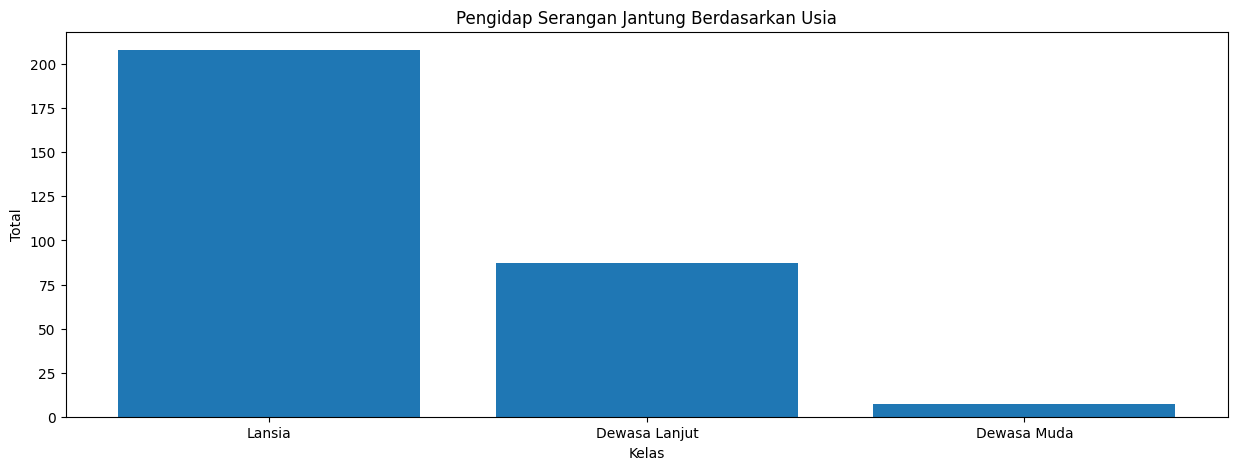

In [ ]:
pengidap = usia_sampel[usia_sampel['target'] == 1]
plt.figure(figsize=(15, 5))
class_counts = usia_sampel['Status Usia'].value_counts()

# Plot bar plot
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Kelas')
plt.ylabel('Total')
plt.title('Pengidap Serangan Jantung Berdasarkan Usia')
plt.xticks(class_counts.index)
plt.show()

### Fitur 2 (Kolestrol)
- Baik = di bawah 200 mg/dL.
- Perbatasan = 200-239 mg/dL.
- Berbahaya = Di atas 240 mg/dL.


In [ ]:
# Fungsi untuk menentukan status berdasarkan nilai chol
def status(kolestrol):
    if kolestrol <=  200:
        return 'Baik'
    elif 200 < kolestrol <= 239:
        return 'Perbatasan'
    else:
        return 'Berbahaya'

# Mendefinisikan kolom 'Status BMI' dengan menerapkan fungsi status
data_cleaning['Tingkat Kolestrol'] = data_cleaning['chol'].apply(status)
data_cleaning.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Status Usia,Tingkat Kolestrol
0,52,1,0,125,212.0,0,1,168,0,1.0,2,2,3,0,Lansia,Perbatasan
1,53,1,0,140,203.0,1,0,155,1,3.1,0,0,3,0,Lansia,Perbatasan
2,70,1,0,145,174.0,0,1,125,1,2.6,0,0,3,0,Lansia,Baik
3,61,1,0,148,203.0,0,1,161,0,0.0,2,1,3,0,Lansia,Perbatasan
4,62,0,0,138,294.0,1,1,106,0,1.9,1,3,2,0,Lansia,Berbahaya


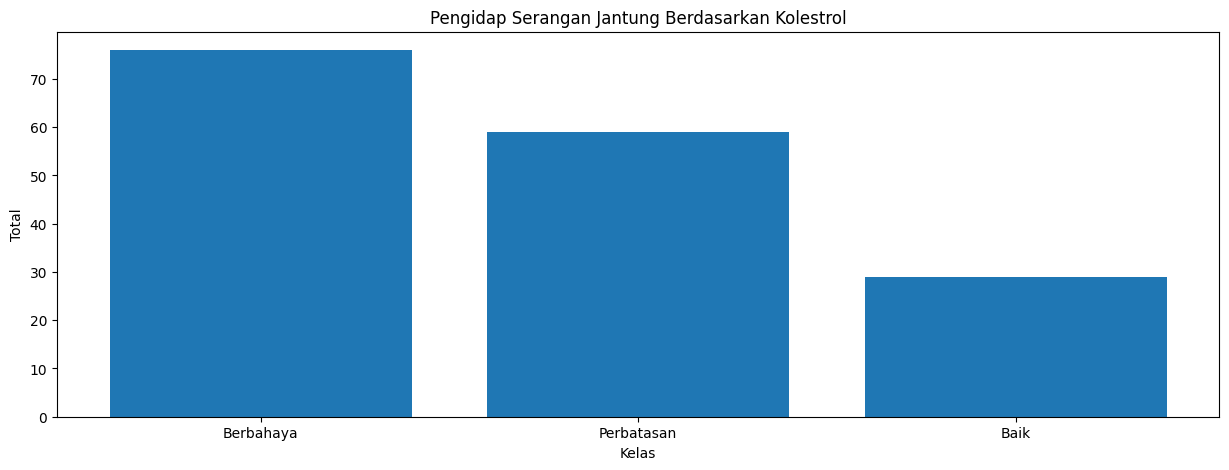

In [ ]:
pengidap1 = data_cleaning[data_cleaning['target'] == 1]
plt.figure(figsize=(15, 5))
class_counts = pengidap1['Tingkat Kolestrol'].value_counts()

# Plot bar plot
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Kelas')
plt.ylabel('Total')
plt.title('Pengidap Serangan Jantung Berdasarkan Kolestrol')
plt.xticks(class_counts.index)
plt.show()

### Fitur 3
Keadaan normal detak jantung saat berolahraga
- Usia 20 - 35 tahun adalah 95 - 170 kali per menit.
- Usia 35 - 50 berkisar 85 - 155 kali per menit.
- Di atas 60 tahun kecepatannya antara 80-130 kali per menit.


In [ ]:
muda = data_cleaning[(data_cleaning['age'] >= 20) & (data_cleaning['age'] <= 35)]
menengah = data_cleaning[(data_cleaning['age'] > 35) & (data_cleaning['age'] < 50)]
tua = data_cleaning[data_cleaning['age'] >= 50]

In [ ]:
menengah

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Status Usia,Tingkat Kolestrol
8,46,1,0,120,249.0,0,0,144,0,0.8,2,0,3,0,Dewasa Lanjut,Berbahaya
11,43,0,0,132,341.0,1,0,136,1,3.0,1,0,3,0,Dewasa Lanjut,Berbahaya
21,45,1,0,104,208.0,0,0,148,1,3.0,1,0,2,1,Dewasa Lanjut,Perbatasan
23,42,0,2,120,209.0,0,1,173,0,0.0,1,0,2,1,Dewasa Lanjut,Perbatasan
25,44,1,2,130,233.0,0,1,179,1,0.4,2,0,2,1,Dewasa Lanjut,Perbatasan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,44,1,2,140,235.0,0,0,180,0,0.0,2,0,2,1,Dewasa Lanjut,Perbatasan
280,46,1,1,101,197.0,1,1,156,0,0.0,2,0,3,1,Dewasa Lanjut,Baik
286,43,1,0,115,303.0,0,1,181,0,1.2,1,0,2,1,Dewasa Lanjut,Berbahaya
293,39,1,0,118,219.0,0,1,140,0,1.2,1,0,3,0,Dewasa Lanjut,Perbatasan


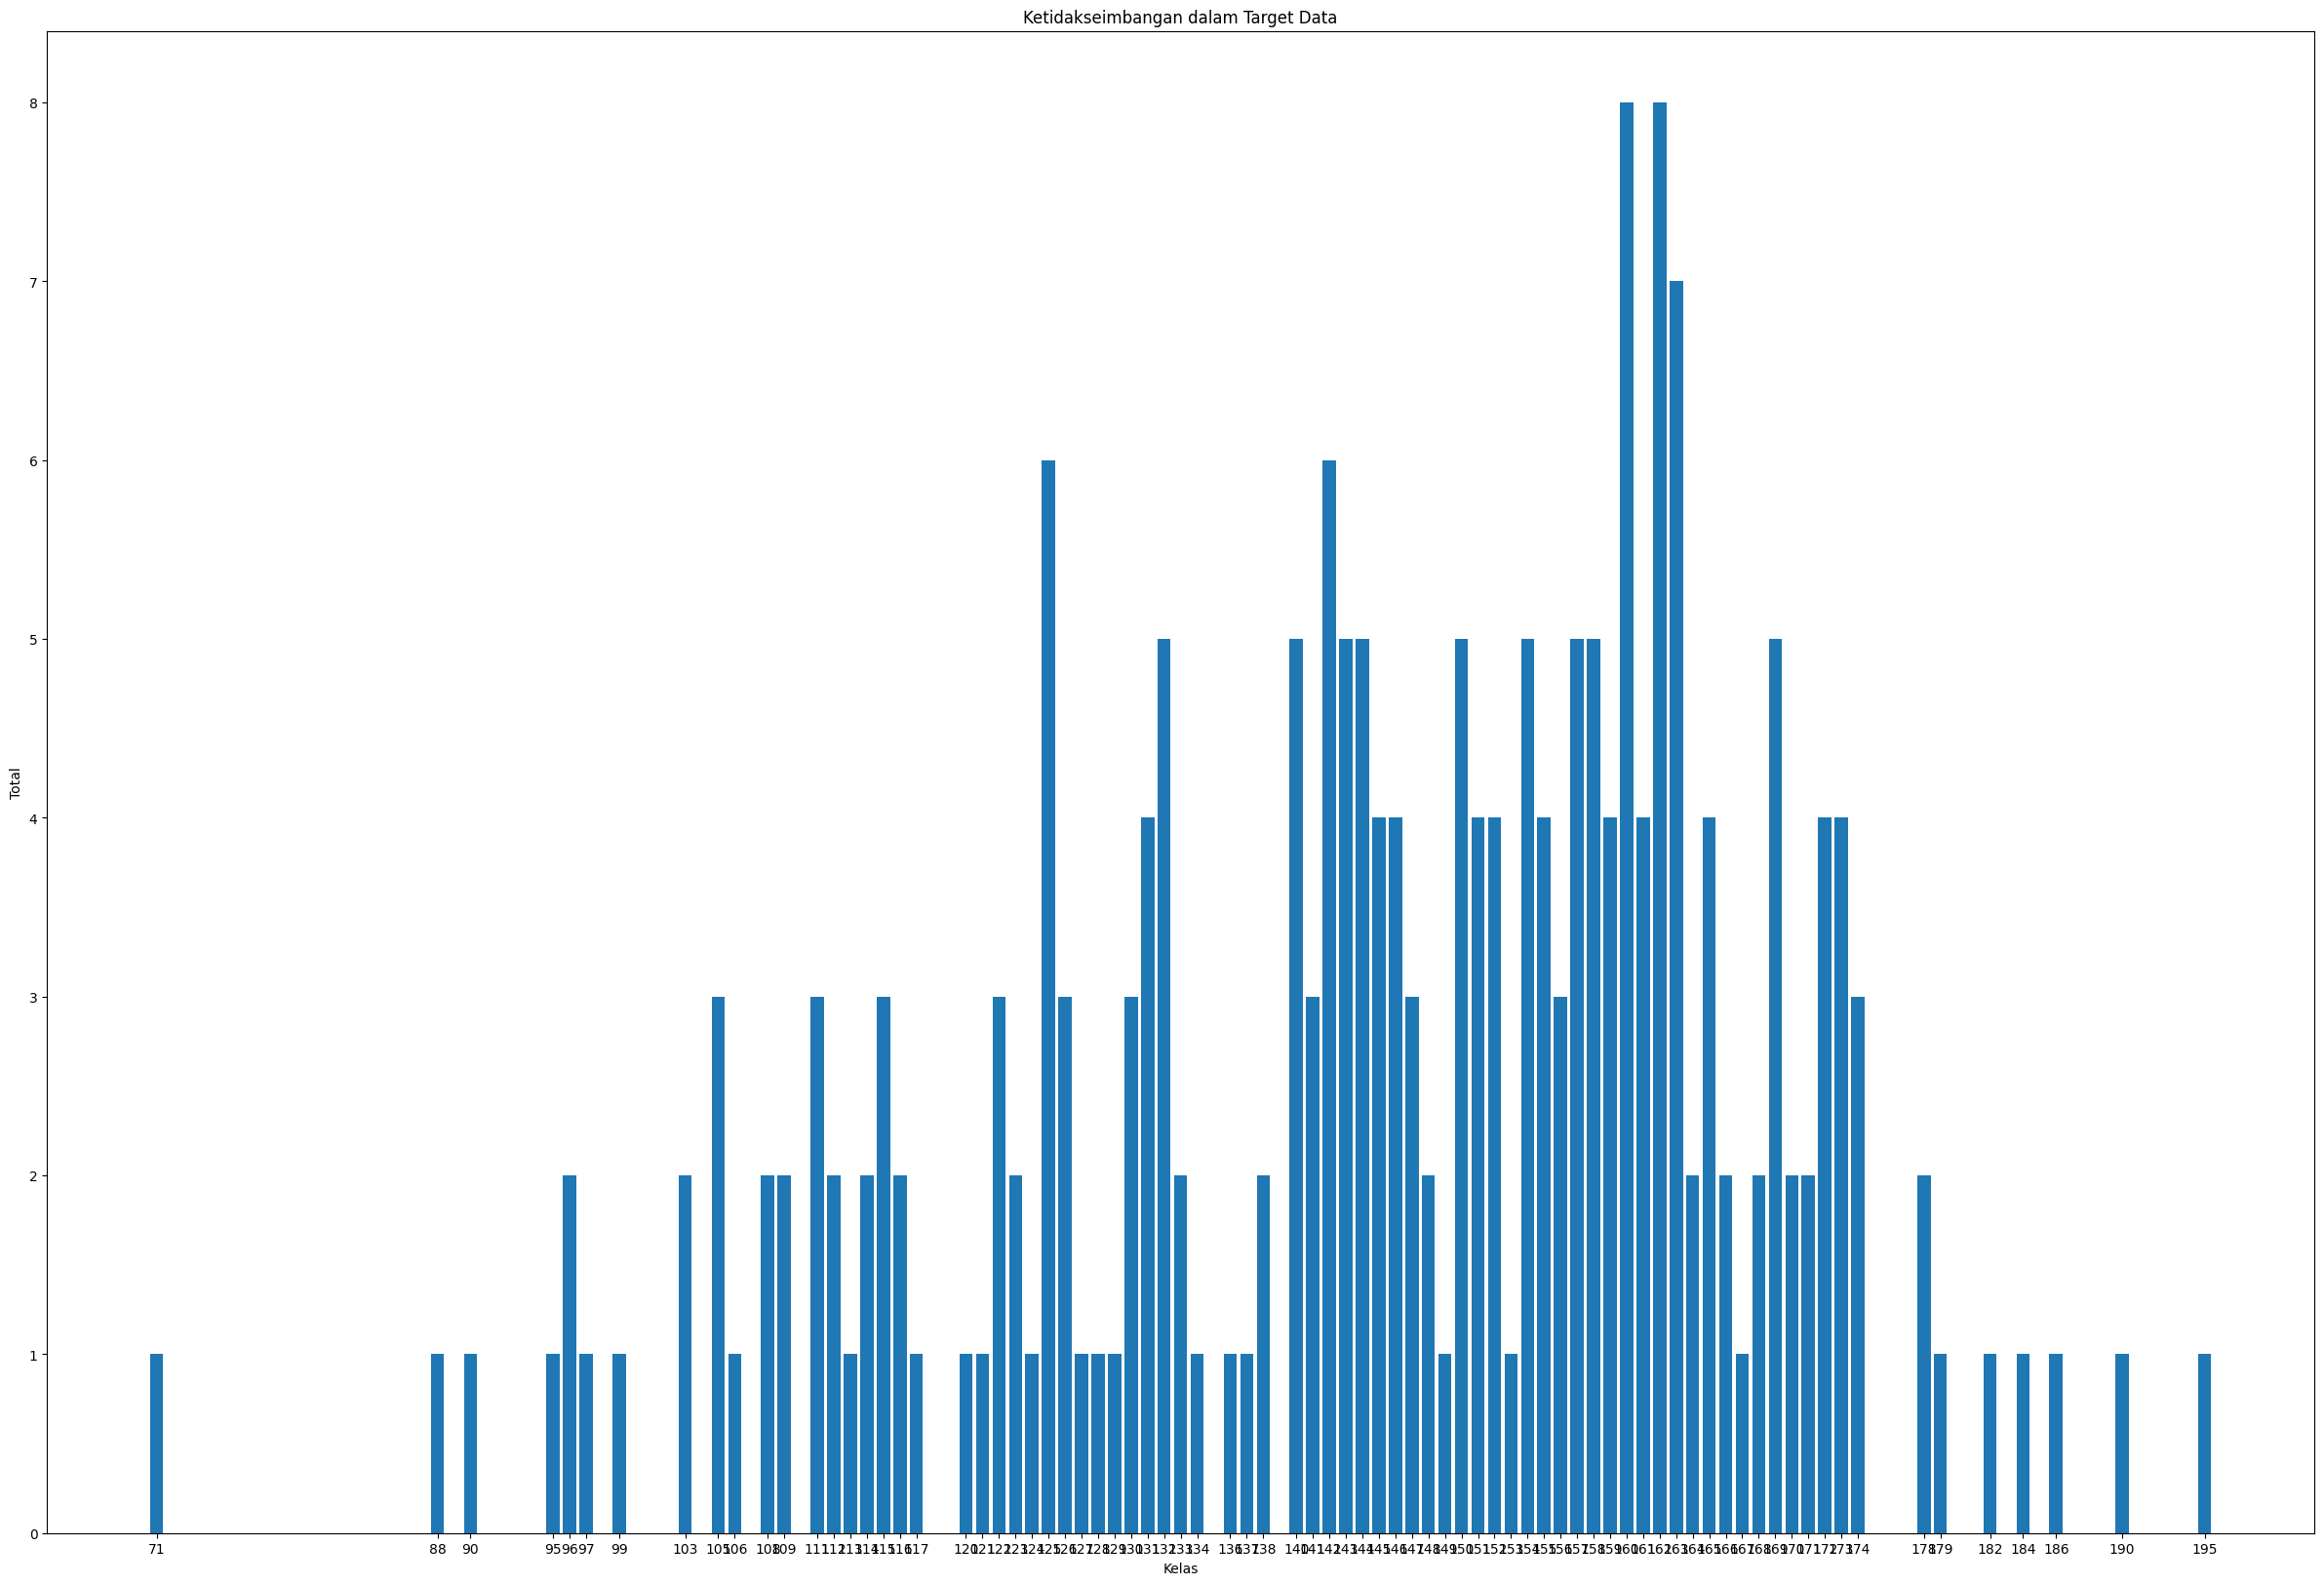

In [ ]:
plt.figure(figsize=(30, 20))
class_counts = tua['thalach'].value_counts()

# Plot bar plot
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Kelas')
plt.ylabel('Total')
plt.title('Ketidakseimbangan dalam Target Data')
plt.xticks(class_counts.index)
plt.show()

In [ ]:
# Fungsi untuk menentukan status berdasarkan nilai trestbps
def status_bps_muda(bps):
    if 95 <= bps <= 170:
        return 'Normal'
    else:
        return 'Tidak Normal'

def status_bps_menengah(bps):
    if 85 <= bps <= 155:
        return 'Normal'
    else:
        return 'Tidak Normal'

def status_bps_tua(bps):
    if 80 <= bps <= 130:
        return 'Normal'
    else:
        return 'Tidak Normal'

# Memilih data untuk muda, menengah, dan tua
muda = data_cleaning[(data_cleaning['age'] >= 20) & (data_cleaning['age'] <= 35)]
menengah = data_cleaning[(data_cleaning['age'] > 35) & (data_cleaning['age'] < 50)]
tua = data_cleaning[data_cleaning['age'] >= 50]

# Menentukan tingkat denyut jantung untuk setiap kelompok usia
muda['Tingkat Denyut Jantung'] = muda['thalach'].apply(status_bps_muda)
menengah['Tingkat Denyut Jantung'] = menengah['thalach'].apply(status_bps_menengah)
tua['Tingkat Denyut Jantung'] = tua['thalach'].apply(status_bps_tua)

# Menggabungkan kembali data
data_cleaning = pd.concat([muda, menengah, tua])

data_cleaning.head()


<ipython-input-43-0668bb245db1>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muda['Tingkat Denyut Jantung'] = muda['thalach'].apply(status_bps_muda)
<ipython-input-43-0668bb245db1>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  menengah['Tingkat Denyut Jantung'] = menengah['thalach'].apply(status_bps_menengah)
<ipython-input-43-0668bb245db1>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Status Usia,Tingkat Kolestrol,Tingkat Denyut Jantung
12,34,0,1,118,210.0,0,1,192,0,0.7,2,0,2,1,Dewasa Muda,Perbatasan,Tidak Normal
56,29,1,1,130,204.0,0,0,202,0,0.0,2,0,2,1,Dewasa Muda,Perbatasan,Tidak Normal
117,34,1,3,118,182.0,0,0,174,0,0.0,2,0,2,1,Dewasa Muda,Baik,Tidak Normal
182,35,1,0,120,198.0,0,1,130,1,1.6,1,0,3,0,Dewasa Muda,Baik,Normal
184,35,0,0,138,183.0,0,1,182,0,1.4,2,0,2,1,Dewasa Muda,Baik,Tidak Normal


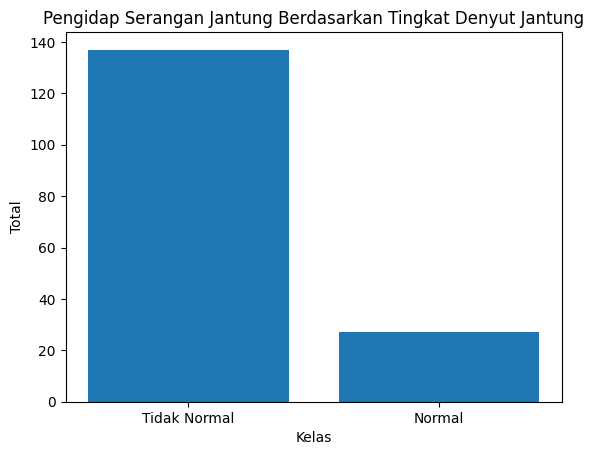

In [ ]:
pengidap2 = data_cleaning[data_cleaning['target'] == 1]
class_counts = pengidap2['Tingkat Denyut Jantung'].value_counts()

# Plot bar plot
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Kelas')
plt.ylabel('Total')
plt.title('Pengidap Serangan Jantung Berdasarkan Tingkat Denyut Jantung')
plt.xticks(class_counts.index)
plt.show()

### Fitur 4
Masalah metabolisme ketika kolestrol dan juga diabetes

In [ ]:
masalah_metaboisme = data_cleaning[(data_cleaning['chol'] > 200) & (data_cleaning['fbs'] == 1)]
masalah_metaboisme.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Status Usia,Tingkat Kolestrol,Tingkat Denyut Jantung
11,43,0,0,132,341.0,1,0,136,1,3.0,1,0,3,0,Dewasa Lanjut,Berbahaya,Normal
68,48,1,0,130,256.0,1,0,150,1,0.0,2,2,3,0,Dewasa Lanjut,Berbahaya,Normal
70,48,1,2,124,255.0,1,1,175,0,0.0,2,2,2,1,Dewasa Lanjut,Berbahaya,Tidak Normal
161,42,1,2,120,240.0,1,1,194,0,0.8,0,0,3,1,Dewasa Lanjut,Berbahaya,Tidak Normal
227,43,1,0,132,247.0,1,0,143,1,0.1,1,4,3,0,Dewasa Lanjut,Berbahaya,Normal


In [ ]:
bermasalah = data_cleaning[(data_cleaning['fbs'] == 1) & (data_cleaning['chol'] > 200)]
agak_aman = data_cleaning[(data_cleaning['fbs'] == 1) & (data_cleaning['age'] <= 200)]
agak_aman1 = data_cleaning[(data_cleaning['fbs'] == 0) & (data_cleaning['age'] > 200)]
aman = data_cleaning[(data_cleaning['fbs'] == 0) & (data_cleaning['age'] <= 200)]

bermasalah['Metabolisme'] = 'Bermasalah'
agak_aman['Metabolisme'] = 'Waspada'
agak_aman1['Metabolisme'] = 'Waspada'
aman['Metabolisme'] = 'Baik'

data_cleaning = pd.concat([bermasalah, agak_aman, agak_aman1, aman])

data_cleaning.head()


<ipython-input-46-74cb1491a318>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bermasalah['Metabolisme'] = 'Bermasalah'
<ipython-input-46-74cb1491a318>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agak_aman['Metabolisme'] = 'Waspada'
<ipython-input-46-74cb1491a318>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Status Usia,Tingkat Kolestrol,Tingkat Denyut Jantung,Metabolisme
11,43,0,0,132,341.0,1,0,136,1,3.0,1,0,3,0,Dewasa Lanjut,Berbahaya,Normal,Bermasalah
68,48,1,0,130,256.0,1,0,150,1,0.0,2,2,3,0,Dewasa Lanjut,Berbahaya,Normal,Bermasalah
70,48,1,2,124,255.0,1,1,175,0,0.0,2,2,2,1,Dewasa Lanjut,Berbahaya,Tidak Normal,Bermasalah
161,42,1,2,120,240.0,1,1,194,0,0.8,0,0,3,1,Dewasa Lanjut,Berbahaya,Tidak Normal,Bermasalah
227,43,1,0,132,247.0,1,0,143,1,0.1,1,4,3,0,Dewasa Lanjut,Berbahaya,Normal,Bermasalah


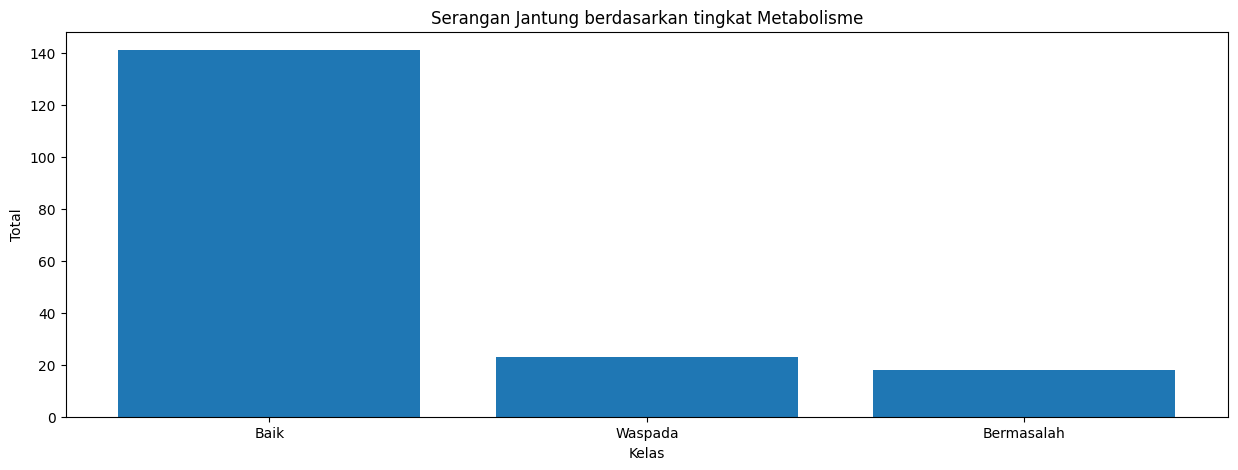

In [ ]:
pengidap3 = data_cleaning[data_cleaning['target'] == 1]
plt.figure(figsize=(15, 5))
class_counts = pengidap3['Metabolisme'].value_counts()

# Plot bar plot
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Kelas')
plt.ylabel('Total')
plt.title('Serangan Jantung berdasarkan tingkat Metabolisme')
plt.xticks(class_counts.index)
plt.show()

### Fitur 5
Penggolongan Tekanan Darah
- Kolom trestbps menunjukkan tekanan darah sistolik (bagian pertama dari pembacaan tekanan darah)
- Normal: 120
- Hipotensi: Lebih rendah dari 120
- Hipertensi: Antara 121-160

In [ ]:
# Fungsi untuk menentukan status berdasarkan nilai trestbps
def status_trestbps(trestbps):
    if trestbps ==  120:
        return 'Normal'
    elif trestbps < 120:
        return 'Hipotensi'
    else:
        return 'Hipertensi'

# Mendefinisikan kolom 'Status BMI' dengan menerapkan fungsi status
data_cleaning['Tekanan Darah'] = data_cleaning['trestbps'].apply(status_trestbps)
data_cleaning.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Status Usia,Tingkat Kolestrol,Tingkat Denyut Jantung,Metabolisme,Tekanan Darah
11,43,0,0,132,341.0,1,0,136,1,3.0,1,0,3,0,Dewasa Lanjut,Berbahaya,Normal,Bermasalah,Hipertensi
68,48,1,0,130,256.0,1,0,150,1,0.0,2,2,3,0,Dewasa Lanjut,Berbahaya,Normal,Bermasalah,Hipertensi
70,48,1,2,124,255.0,1,1,175,0,0.0,2,2,2,1,Dewasa Lanjut,Berbahaya,Tidak Normal,Bermasalah,Hipertensi
161,42,1,2,120,240.0,1,1,194,0,0.8,0,0,3,1,Dewasa Lanjut,Berbahaya,Tidak Normal,Bermasalah,Normal
227,43,1,0,132,247.0,1,0,143,1,0.1,1,4,3,0,Dewasa Lanjut,Berbahaya,Normal,Bermasalah,Hipertensi


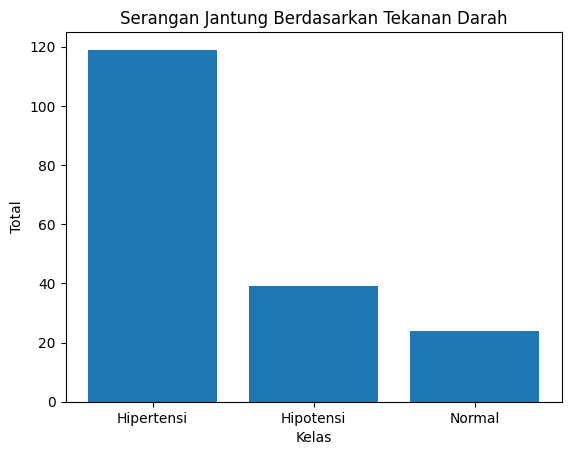

In [ ]:
pengidap4 = data_cleaning[data_cleaning['target'] == 1]
class_counts = pengidap4['Tekanan Darah'].value_counts()

# Plot bar plot
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Kelas')
plt.ylabel('Total')
plt.title('Serangan Jantung Berdasarkan Tekanan Darah')
plt.xticks(class_counts.index)
plt.show()


### Fitur 6
Kemungkinan Merokok, saya mengasumsikan jika :
- Kolesterol = lebih besar dari 200
- Tekanan darah = Hipotensi
- EKG(restecg) > 0
    -    Nilai 0: Hasil EKG normal.
    -    Nilai 1: Terdapat bukti hipertrofi ventrikel kiri (Ventricular Hypertrophy) menurut kriteria Estes.
    -    Nilai 2: Terdapat gelombang ST-T tidak normal (T wave inversion dan / atau - ST elevation atau depresi > 0,05 mV), yang dapat mengindikasikan iskemia miokard atau perubahan non-spesifik lainnya.



In [ ]:
data_cleaning['Merokok'] = 'Tidak'
data_cleaning.loc[(data_cleaning['chol'] >200)  & (data_cleaning['Tekanan Darah'] == "Hipertensi") & (data_cleaning['restecg']> 0), 'Merokok'] = 'Ya'

data_cleaning.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Status Usia,Tingkat Kolestrol,Tingkat Denyut Jantung,Metabolisme,Tekanan Darah,Merokok
11,43,0,0,132,341.0,1,0,136,1,3.0,1,0,3,0,Dewasa Lanjut,Berbahaya,Normal,Bermasalah,Hipertensi,Tidak
68,48,1,0,130,256.0,1,0,150,1,0.0,2,2,3,0,Dewasa Lanjut,Berbahaya,Normal,Bermasalah,Hipertensi,Tidak
70,48,1,2,124,255.0,1,1,175,0,0.0,2,2,2,1,Dewasa Lanjut,Berbahaya,Tidak Normal,Bermasalah,Hipertensi,Ya
161,42,1,2,120,240.0,1,1,194,0,0.8,0,0,3,1,Dewasa Lanjut,Berbahaya,Tidak Normal,Bermasalah,Normal,Tidak
227,43,1,0,132,247.0,1,0,143,1,0.1,1,4,3,0,Dewasa Lanjut,Berbahaya,Normal,Bermasalah,Hipertensi,Tidak


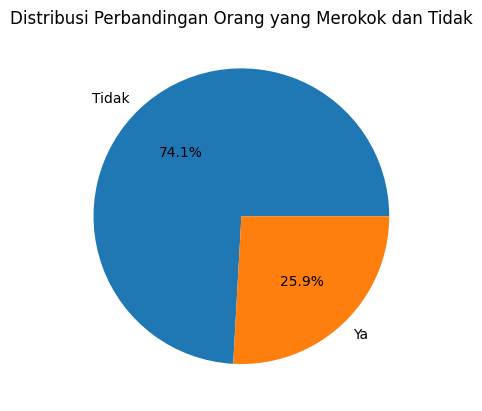

In [ ]:
class_counts = data_cleaning['Merokok'].value_counts()

# Plot pie chart
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Distribusi Perbandingan Orang yang Merokok dan Tidak')
plt.show()

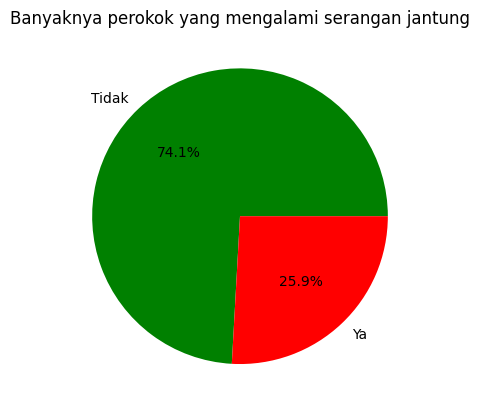

In [ ]:
# Plot pie chart dengan label warna hijau untuk "kehidupan" dan merah untuk "kematian"
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Banyaknya perokok yang mengalami serangan jantung')
plt.show()


Merokok bukanlah penyebab yang sangat berpengaruh terhadap serangan jantung.

### Fitur 7
Iskemia Miokard
Iskemia miokard adalah kondisi di mana pasokan darah ke jantung terbatas atau terganggu, biasanya terjadi karena penyumbatan pembuluh darah koroner.

- exang(Terjadinya Angina Saat Berolahraga)	= 1
- oldpeak > 2
    - Nilai Rendah (0.0 - 1.0): Biasanya dianggap sebagai tanda iskemia miokard yang ringan hingga sedang.
    - Nilai Sedang (1.0 - 2.0): Menunjukkan iskemia miokard yang sedang hingga signifikan.
    - Nilai Tinggi (> 2.0): Dapat menunjukkan iskemia miokard yang signifikan hingga berat.

In [ ]:
data_cleaning['Kemungkinan Iskemia Miokard'] = 'Tidak'
data_cleaning.loc[(data_cleaning['exang'] == 1) & (data_cleaning['oldpeak'] > 2), 'Kemungkinan Iskemia Miokard'] = 'Ada'

data_cleaning.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,ca,thal,target,Status Usia,Tingkat Kolestrol,Tingkat Denyut Jantung,Metabolisme,Tekanan Darah,Merokok,Kemungkinan Iskemia Miokard
11,43,0,0,132,341.0,1,0,136,1,3.0,...,0,3,0,Dewasa Lanjut,Berbahaya,Normal,Bermasalah,Hipertensi,Tidak,Ada
68,48,1,0,130,256.0,1,0,150,1,0.0,...,2,3,0,Dewasa Lanjut,Berbahaya,Normal,Bermasalah,Hipertensi,Tidak,Tidak
70,48,1,2,124,255.0,1,1,175,0,0.0,...,2,2,1,Dewasa Lanjut,Berbahaya,Tidak Normal,Bermasalah,Hipertensi,Ya,Tidak
161,42,1,2,120,240.0,1,1,194,0,0.8,...,0,3,1,Dewasa Lanjut,Berbahaya,Tidak Normal,Bermasalah,Normal,Tidak,Tidak
227,43,1,0,132,247.0,1,0,143,1,0.1,...,4,3,0,Dewasa Lanjut,Berbahaya,Normal,Bermasalah,Hipertensi,Tidak,Tidak


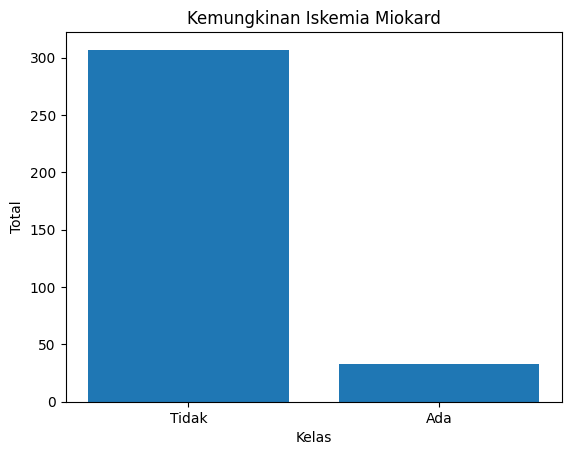

In [ ]:
class_counts = data_cleaning['Kemungkinan Iskemia Miokard'].value_counts()

# Plot bar plot
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Kelas')
plt.ylabel('Total')
plt.title('Kemungkinan Iskemia Miokard')
plt.xticks(class_counts.index)
plt.show()

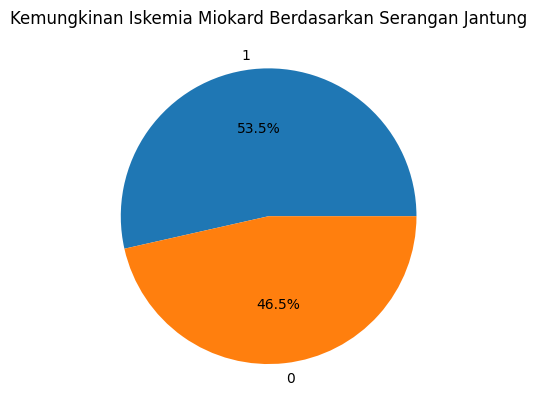

In [ ]:
im = data_cleaning[(data_cleaning['Kemungkinan Iskemia Miokard'] == "Ada")]

class_counts = data_cleaning['target'].value_counts()

# Plot pie chart
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Kemungkinan Iskemia Miokard Berdasarkan Serangan Jantung')
plt.show()

Iskemia Miokard kurang berhubungan dengan serangan jantung

### Fitur 8
Gangguan Pernafasan
- Tingkat Kolestrol dan Tingkat Denyut Jantung
- Tingkat Kolestrol lebih besar dari 200

In [ ]:
data_A = data_cleaning[data_cleaning['target'] ==1]
data_A = data_A[['chol', 'Tingkat Denyut Jantung', 'target']]
data_A['Gangguan Pernafasan'] = 'Undefined'
data_A.loc[(data_A['chol'] >200) & (data_A['Tingkat Denyut Jantung'] == "Tidak Normal"), 'Gangguan Pernafasan'] = 'Gangguan Pernafasan'
data_A

,chol,Tingkat Denyut Jantung,target,Gangguan Pernafasan
70,255.0,Tidak Normal,1,Gangguan Pernafasan
161,240.0,Tidak Normal,1,Gangguan Pernafasan
18,211.0,Tidak Normal,1,Gangguan Pernafasan
47,283.0,Tidak Normal,1,Gangguan Pernafasan
58,212.0,Tidak Normal,1,Gangguan Pernafasan
...,...,...,...,...
287,239.0,Tidak Normal,1,Gangguan Pernafasan
290,177.0,Tidak Normal,1,Undefined
291,226.0,Normal,1,Undefined
292,250.0,Tidak Normal,1,Gangguan Pernafasan


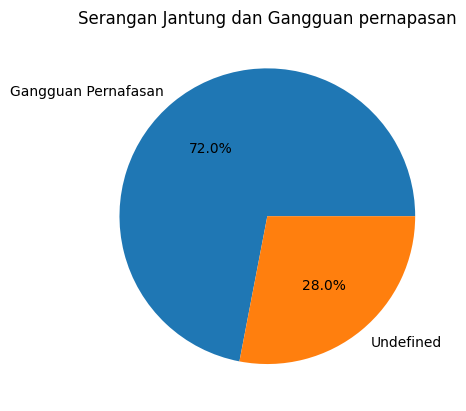

In [ ]:
class_counts = data_A['Gangguan Pernafasan'].value_counts()

# Plot pie chart
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Serangan Jantung dan Gangguan pernapasan')
plt.show()

Sekitar 72% dari pengidap serangan jantung mengalamu gangguan pernapasan karena tingginya tingkat koletrol dan denyut jantung yang tidak normal

### Fitur 9
(1 = pria; 0 = wanita)
- Status dan gender

In [ ]:
data_cleaning['Status Usia dan Gender'] = 'Undefined'
data_cleaning.loc[(data_cleaning['Status Usia'] == 'Lansia') & (data_cleaning['sex'] == 1), 'Status Usia dan Gender'] = 'Pria Lansia'
data_cleaning.loc[(data_cleaning['Status Usia'] == 'Dewasa Lanjut') & (data_cleaning['sex'] == 1), 'Status Usia dan Gender'] = 'Pria Dewasa Lanjut'
data_cleaning.loc[(data_cleaning['Status Usia'] == 'Dewasa Muda') & (data_cleaning['sex'] == 1), 'Status Usia dan Gender'] = 'Pria Dewasa Muda'
data_cleaning.loc[(data_cleaning['Status Usia'] == 'Lansia') & (data_cleaning['sex'] == 0), 'Status Usia dan Gender'] = 'Wanita Lansia'
data_cleaning.loc[(data_cleaning['Status Usia'] == 'Dewasa Lanjut') & (data_cleaning['sex'] == 0), 'Status Usia dan Gender'] = 'Wanita Dewasa Lanjut'
data_cleaning.loc[(data_cleaning['Status Usia'] == 'Dewasa Muda') & (data_cleaning['sex'] == 0), 'Status Usia dan Gender'] = 'Wanita Dewasa Muda'
data_cleaning.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,Status Usia,Tingkat Kolestrol,Tingkat Denyut Jantung,Metabolisme,Tekanan Darah,Merokok,Kemungkinan Iskemia Miokard,Status Usia dan Gender
11,43,0,0,132,341.0,1,0,136,1,3.0,...,3,0,Dewasa Lanjut,Berbahaya,Normal,Bermasalah,Hipertensi,Tidak,Ada,Wanita Dewasa Lanjut
68,48,1,0,130,256.0,1,0,150,1,0.0,...,3,0,Dewasa Lanjut,Berbahaya,Normal,Bermasalah,Hipertensi,Tidak,Tidak,Pria Dewasa Lanjut
70,48,1,2,124,255.0,1,1,175,0,0.0,...,2,1,Dewasa Lanjut,Berbahaya,Tidak Normal,Bermasalah,Hipertensi,Ya,Tidak,Pria Dewasa Lanjut
161,42,1,2,120,240.0,1,1,194,0,0.8,...,3,1,Dewasa Lanjut,Berbahaya,Tidak Normal,Bermasalah,Normal,Tidak,Tidak,Pria Dewasa Lanjut
227,43,1,0,132,247.0,1,0,143,1,0.1,...,3,0,Dewasa Lanjut,Berbahaya,Normal,Bermasalah,Hipertensi,Tidak,Tidak,Pria Dewasa Lanjut


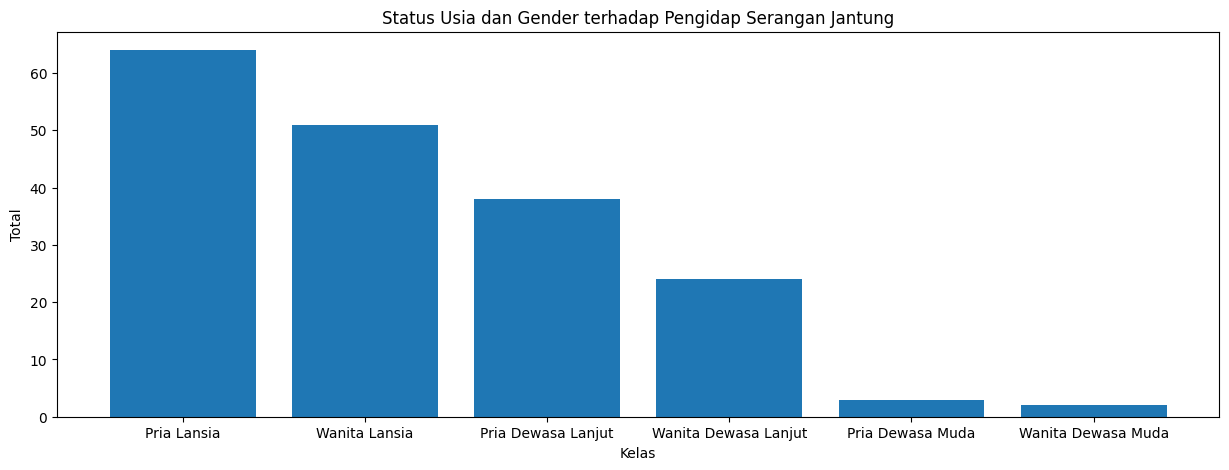

In [ ]:

pengidap5 = data_cleaning[data_cleaning['target'] ==1]
plt.figure(figsize=(15, 5))
class_counts = pengidap5['Status Usia dan Gender'].value_counts()

# Plot bar plot
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Kelas')
plt.ylabel('Total')
plt.title('Status Usia dan Gender terhadap Pengidap Serangan Jantung')
plt.xticks(class_counts.index)
plt.show()

Dari data tersebut dapat diketahui jika pengidap serangan jantung lebih dominan terhadap pria lansia dan wanita lansia. Dapat diasumsikan jika pengaruh yang lebih utama ada pada usia dan kemudian dipengaruhi oleh gender.

### Fitur 10
Status Usia dan Hipertensi

In [ ]:

data_cleaning['Status Usia dan Tekanan Darah'] = 'Undefined'
data_cleaning.loc[(data_cleaning['Status Usia'] == 'Lansia') & (data_cleaning['Tekanan Darah'] == "Hipertensi"), 'Status Usia dan Tekanan Darah'] = 'Lansia Hipertensi'
data_cleaning.loc[(data_cleaning['Status Usia'] == 'Dewasa Lanjut') & (data_cleaning['Tekanan Darah'] == "Hipertensi"), 'Status Usia dan Tekanan Darah'] = 'Dewasa Lanjut Hipertensi'
data_cleaning.loc[(data_cleaning['Status Usia'] == 'Dewasa Muda') & (data_cleaning['Tekanan Darah'] == "Hipertensi"), 'Status Usia dan Tekanan Darah'] = 'Dewasa Muda Hipertensi'
data_cleaning.loc[(data_cleaning['Status Usia'] == 'Lansia') & (data_cleaning['Tekanan Darah'] == "Normal"), 'Status Usia dan Tekanan Darah'] = 'Lansia Normal'
data_cleaning.loc[(data_cleaning['Status Usia'] == 'Dewasa Lanjut') & (data_cleaning['Tekanan Darah'] == "Normal"), 'Status Usia dan Tekanan Darah'] = 'Dewasa Lanjut Normal'
data_cleaning.loc[(data_cleaning['Status Usia'] == 'Dewasa Muda') & (data_cleaning['Tekanan Darah'] == 'Normal'), 'Status Usia dan Tekanan Darah'] = 'Dewasa Muda Normal'
data_cleaning.loc[(data_cleaning['Status Usia'] == 'Lansia') & (data_cleaning['Tekanan Darah'] == "Hipotensi"), 'Status Usia dan Tekanan Darah'] = 'Lansia Hipotensi'
data_cleaning.loc[(data_cleaning['Status Usia'] == 'Dewasa Lanjut') & (data_cleaning['Tekanan Darah'] == 'Hipotensi'), 'Status Usia dan Tekanan Darah'] = 'Hipotensi'
data_cleaning.loc[(data_cleaning['Status Usia'] == 'Dewasa Muda') & (data_cleaning['Tekanan Darah'] == "Hipotensi"), 'Status Usia dan Tekanan Darah'] = 'Hipotensi'
data_cleaning.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,target,Status Usia,Tingkat Kolestrol,Tingkat Denyut Jantung,Metabolisme,Tekanan Darah,Merokok,Kemungkinan Iskemia Miokard,Status Usia dan Gender,Status Usia dan Tekanan Darah
11,43,0,0,132,341.0,1,0,136,1,3.0,...,0,Dewasa Lanjut,Berbahaya,Normal,Bermasalah,Hipertensi,Tidak,Ada,Wanita Dewasa Lanjut,Dewasa Lanjut Hipertensi
68,48,1,0,130,256.0,1,0,150,1,0.0,...,0,Dewasa Lanjut,Berbahaya,Normal,Bermasalah,Hipertensi,Tidak,Tidak,Pria Dewasa Lanjut,Dewasa Lanjut Hipertensi
70,48,1,2,124,255.0,1,1,175,0,0.0,...,1,Dewasa Lanjut,Berbahaya,Tidak Normal,Bermasalah,Hipertensi,Ya,Tidak,Pria Dewasa Lanjut,Dewasa Lanjut Hipertensi
161,42,1,2,120,240.0,1,1,194,0,0.8,...,1,Dewasa Lanjut,Berbahaya,Tidak Normal,Bermasalah,Normal,Tidak,Tidak,Pria Dewasa Lanjut,Dewasa Lanjut Normal
227,43,1,0,132,247.0,1,0,143,1,0.1,...,0,Dewasa Lanjut,Berbahaya,Normal,Bermasalah,Hipertensi,Tidak,Tidak,Pria Dewasa Lanjut,Dewasa Lanjut Hipertensi


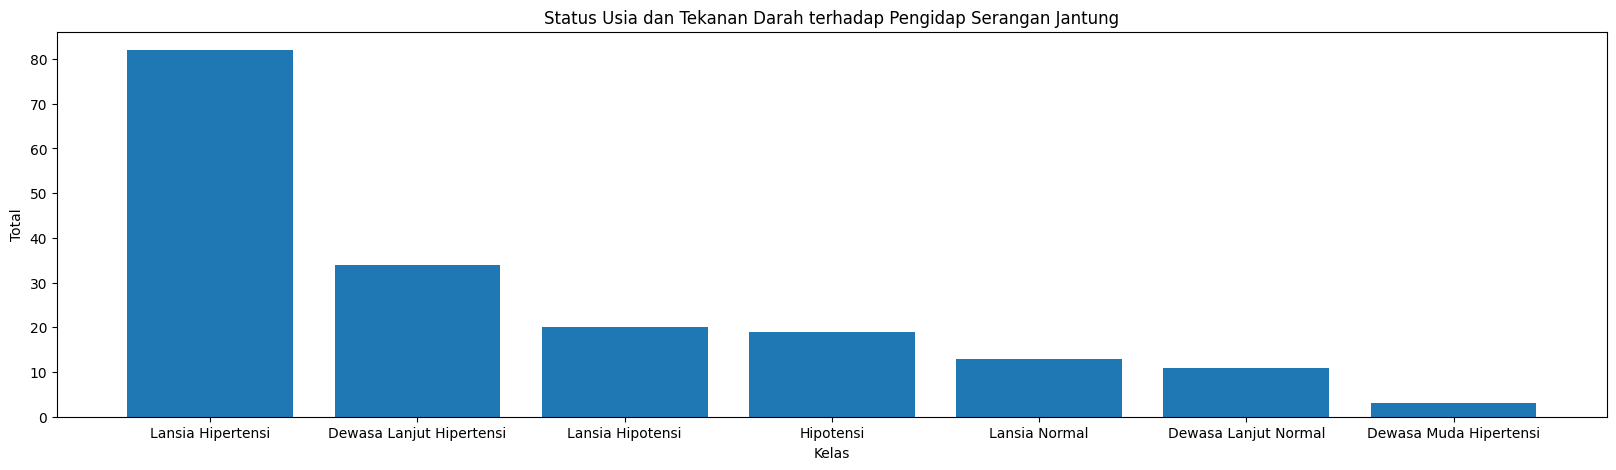

In [ ]:

pengidap6 = data_cleaning[data_cleaning['target'] ==1]
plt.figure(figsize=(20, 5))
class_counts = pengidap6['Status Usia dan Tekanan Darah'].value_counts()

# Plot bar plot
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Kelas')
plt.ylabel('Total')
plt.title('Status Usia dan Tekanan Darah terhadap Pengidap Serangan Jantung')
plt.xticks(class_counts.index)
plt.show()

Lansia dan dewasa lanjut yang menderita Hipertensi lebih berkemungkinan mengalami serangan jantung

# Machine Learning

## Data

Data diambil dari penyelesaian soal Data Processing sehingga data tersebut dapat langsung dilanjutkan ke proses pemodelan machine learning

In [ ]:
data_cleaning.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,target,Status Usia,Tingkat Kolestrol,Tingkat Denyut Jantung,Metabolisme,Tekanan Darah,Merokok,Kemungkinan Iskemia Miokard,Status Usia dan Gender,Status Usia dan Tekanan Darah
11,43,0,0,132,341.0,1,0,136,1,3.0,...,0,Dewasa Lanjut,Berbahaya,Normal,Bermasalah,Hipertensi,Tidak,Ada,Wanita Dewasa Lanjut,Dewasa Lanjut Hipertensi
68,48,1,0,130,256.0,1,0,150,1,0.0,...,0,Dewasa Lanjut,Berbahaya,Normal,Bermasalah,Hipertensi,Tidak,Tidak,Pria Dewasa Lanjut,Dewasa Lanjut Hipertensi
70,48,1,2,124,255.0,1,1,175,0,0.0,...,1,Dewasa Lanjut,Berbahaya,Tidak Normal,Bermasalah,Hipertensi,Ya,Tidak,Pria Dewasa Lanjut,Dewasa Lanjut Hipertensi
161,42,1,2,120,240.0,1,1,194,0,0.8,...,1,Dewasa Lanjut,Berbahaya,Tidak Normal,Bermasalah,Normal,Tidak,Tidak,Pria Dewasa Lanjut,Dewasa Lanjut Normal
227,43,1,0,132,247.0,1,0,143,1,0.1,...,0,Dewasa Lanjut,Berbahaya,Normal,Bermasalah,Hipertensi,Tidak,Tidak,Pria Dewasa Lanjut,Dewasa Lanjut Hipertensi


### Label Encoding

Label encoding digunakan untuk mengubah data str menjadi data integer agar dapat dibaca oleh sistem.

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_label_encoded = data_cleaning.copy()

df_label_encoded["Status Usia"] = encoder.fit_transform(data_cleaning["Status Usia"])
df_label_encoded['Tingkat Kolestrol'] = encoder.fit_transform(data_cleaning['Tingkat Kolestrol'])
df_label_encoded['Tingkat Denyut Jantung'] = encoder.fit_transform(data_cleaning['Tingkat Denyut Jantung'])
df_label_encoded['Metabolisme'] = encoder.fit_transform(data_cleaning['Metabolisme'])
df_label_encoded['Tekanan Darah'] = encoder.fit_transform(data_cleaning['Tingkat Kolestrol'])
df_label_encoded['Merokok'] = encoder.fit_transform(data_cleaning['Merokok'])
df_label_encoded['Kemungkinan Iskemia Miokard'] = encoder.fit_transform(data_cleaning['Kemungkinan Iskemia Miokard'])
df_label_encoded['Status Usia dan Gender'] = encoder.fit_transform(data_cleaning['Status Usia dan Gender'])
df_label_encoded['Status Usia dan Tekanan Darah'] = encoder.fit_transform(data_cleaning['Status Usia dan Tekanan Darah'])

df_label_encoded

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,target,Status Usia,Tingkat Kolestrol,Tingkat Denyut Jantung,Metabolisme,Tekanan Darah,Merokok,Kemungkinan Iskemia Miokard,Status Usia dan Gender,Status Usia dan Tekanan Darah
11,43,0,0,132,341.0,1,0,136,1,3.0,...,0,0,1,0,1,1,0,0,3,0
68,48,1,0,130,256.0,1,0,150,1,0.0,...,0,0,1,0,1,1,0,1,0,0
70,48,1,2,124,255.0,1,1,175,0,0.0,...,1,0,1,1,1,1,1,1,0,0
161,42,1,2,120,240.0,1,1,194,0,0.8,...,1,0,1,1,1,1,0,1,0,1
227,43,1,0,132,247.0,1,0,143,1,0.1,...,0,0,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,64,1,2,140,335.0,0,1,158,0,0.0,...,0,2,1,1,0,1,1,1,2,5
297,68,0,2,120,211.0,0,0,115,0,1.5,...,1,2,2,0,0,2,0,1,5,7
299,52,1,0,128,255.0,0,1,161,1,0.0,...,0,2,1,1,0,1,1,1,2,5
300,59,1,3,160,273.0,0,0,125,0,0.0,...,0,2,1,0,0,1,0,1,2,5


### Memindahkan variabel target

Varaibel target(Variabel terikat) dipindahkan agar lebih mudah dibaca saat menggunakan fitur selection

In [ ]:
df_label_encoded.insert(22, 'target', df_label_encoded.pop('target'))

Memisahkan variabel bebas(X) dan variabel terikat(y) diperlukan sebelum melakukan scalling, karena scalling hanya digunakan pada variabel bebas.

In [ ]:
x_1 = df_label_encoded.drop("target", axis=1)
y_1 = df_label_encoded["target"]

Berikut adalah coding python untuk melakukan scalling. Scaling data adalah proses mengubah rentang data agar berada dalam rentang yang lebih kecil. Scaling data bertujuan untuk memastikan semua fitur memiliki skala yang serupa untuk membandingkannya secara setara

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(x_1)
df_scaled = pd.DataFrame(df_scaled, columns=x_1.columns)
df_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,Status Usia,Tingkat Kolestrol,Tingkat Denyut Jantung,Metabolisme,Tekanan Darah,Merokok,Kemungkinan Iskemia Miokard,Status Usia dan Gender,Status Usia dan Tekanan Darah
0,0.291667,0.0,0.000000,0.358491,0.738832,1.0,0.0,0.496183,1.0,0.483871,...,1.000000,0.0,0.5,0.0,0.5,0.5,0.0,0.0,0.6,0.000000
1,0.395833,1.0,0.000000,0.339623,0.446735,1.0,0.0,0.603053,1.0,0.000000,...,1.000000,0.0,0.5,0.0,0.5,0.5,0.0,1.0,0.0,0.000000
2,0.395833,1.0,0.666667,0.283019,0.443299,1.0,0.5,0.793893,0.0,0.000000,...,0.666667,0.0,0.5,1.0,0.5,0.5,1.0,1.0,0.0,0.000000
3,0.270833,1.0,0.666667,0.245283,0.391753,1.0,0.5,0.938931,0.0,0.129032,...,1.000000,0.0,0.5,1.0,0.5,0.5,0.0,1.0,0.0,0.142857
4,0.291667,1.0,0.000000,0.358491,0.415808,1.0,0.0,0.549618,1.0,0.016129,...,1.000000,0.0,0.5,0.0,0.5,0.5,0.0,1.0,0.0,0.000000


### Feature Selection Menggunakan Univariate feature selection serta Feature Engineering Scalling

#### Feature Engineering scalling

Memisahkan variabel bebas(X) dan variabel terikat(y) diperlukan sebelum melakukan scalling, karena scalling hanya digunakan pada variabel bebas.

In [ ]:
x_1 = df_label_encoded.drop("target", axis=1)
y_1 = df_label_encoded["target"]

Berikut adalah coding python untuk melakukan scalling. Scaling data adalah proses mengubah rentang data agar berada dalam rentang yang lebih kecil. Scaling data bertujuan untuk memastikan semua fitur memiliki skala yang serupa untuk membandingkannya secara setara

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(x_1)
df_scaled = pd.DataFrame(df_scaled, columns=x_1.columns)
df_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,Status Usia,Tingkat Kolestrol,Tingkat Denyut Jantung,Metabolisme,Tekanan Darah,Merokok,Kemungkinan Iskemia Miokard,Status Usia dan Gender,Status Usia dan Tekanan Darah
0,0.291667,0.0,0.000000,0.358491,0.738832,1.0,0.0,0.496183,1.0,0.483871,...,1.000000,0.0,0.5,0.0,0.5,0.5,0.0,0.0,0.6,0.000000
1,0.395833,1.0,0.000000,0.339623,0.446735,1.0,0.0,0.603053,1.0,0.000000,...,1.000000,0.0,0.5,0.0,0.5,0.5,0.0,1.0,0.0,0.000000
2,0.395833,1.0,0.666667,0.283019,0.443299,1.0,0.5,0.793893,0.0,0.000000,...,0.666667,0.0,0.5,1.0,0.5,0.5,1.0,1.0,0.0,0.000000
3,0.270833,1.0,0.666667,0.245283,0.391753,1.0,0.5,0.938931,0.0,0.129032,...,1.000000,0.0,0.5,1.0,0.5,0.5,0.0,1.0,0.0,0.142857
4,0.291667,1.0,0.000000,0.358491,0.415808,1.0,0.0,0.549618,1.0,0.016129,...,1.000000,0.0,0.5,0.0,0.5,0.5,0.0,1.0,0.0,0.000000


#### Unvariate Feature Selection

Pada feature selection digunakan Univariate feature selection untuk melihat seberapa besar hubungan yang dimiliki oleh variabel terhadap variabel target, yang di mana akan menghasilkan variabel terbaik

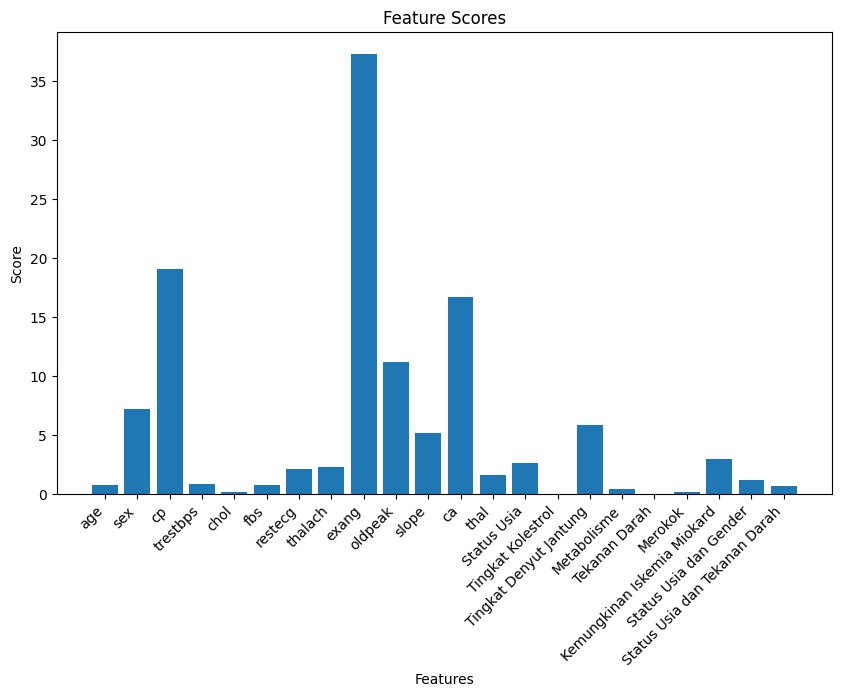

Selected Features:
Index(['sex', 'cp', 'exang', 'oldpeak', 'ca'], dtype='object')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Splitting the data into features (x_1)
x_1 = df_scaled

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_1, y_1, test_size=0.2, random_state=42)

# Feature selection using SelectKBest with chi-square
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

# Plot the scores
plt.figure(figsize=(10,6))
plt.bar(range(len(select_feature.scores_)), select_feature.scores_, tick_label=x_train.columns)
plt.title('Feature Scores')
plt.xlabel('Features')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.show()

# Get the selected feature names
selected_features = x_train.columns[select_feature.get_support(indices=True)]

print("Selected Features:")
print(selected_features)

Dari barplot tersebut kita dapat menyimpulkan jika variabel terbaik ada pada variabel 'sex','cp', 'exang', 'oldpeak', 'ca'

In [ ]:
X_train = select_feature.transform(x_train)
X_test = select_feature.transform(x_test)

In [ ]:
X_test

array([[1.        , 0.        , 1.        , 0.09677419, 0.25      ],
       [1.        , 0.        , 0.        , 0.        , 0.        ],
       [1.        , 0.33333333, 0.        , 0.        , 0.        ],
       [1.        , 0.        , 1.        , 0.01612903, 1.        ],
       [1.        , 0.33333333, 0.        , 0.        , 0.        ],
       [1.        , 0.        , 1.        , 0.19354839, 0.25      ],
       [1.        , 0.        , 1.        , 0.19354839, 0.25      ],
       [1.        , 0.        , 1.        , 0.29032258, 0.5       ],
       [1.        , 0.        , 1.        , 0.        , 0.25      ],
       [1.        , 1.        , 0.        , 0.01612903, 0.25      ],
       [0.        , 0.66666667, 0.        , 0.        , 0.        ],
       [1.        , 0.        , 1.        , 0.48387097, 0.25      ],
       [1.        , 0.        , 1.        , 0.4516129 , 0.25      ],
       [0.        , 0.66666667, 1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.

## Tugas

### 1
Peserta mampu melakukan determinasi machine learning model mana yang relevan sesuai dengan dataset yang telah dipilih dengan problem understanding yang telah dilakukan sebelumnya.

Jawab: \
Data set tersebut merupakan data dari beberapa sampel dari orang-orang yang mengidap serangan jantung dan juga tidak berdasarkan beberapa variabel yang telah disajikan. Dari data tersebut telah memiliki variabel target(label) yaitu \
**0 = Tidak terkena serangan jantung**
\
**1 = Terkena serangan jantung** \
 sehingga lebih cocok menggunakan Supervised Learning untuk machine learning model

### 2
Peserta mampu menyajikan alasan penggunaan machine learning model pada poin 1.

Jawab : \
Supervised Learning melibatkan pembelajaran komputer dari data berlabel yang telah diberikan sebelumnya sehingga kita dapat memprediksi apakah seseorang mengidap serangan janttung ataupun tidak. \


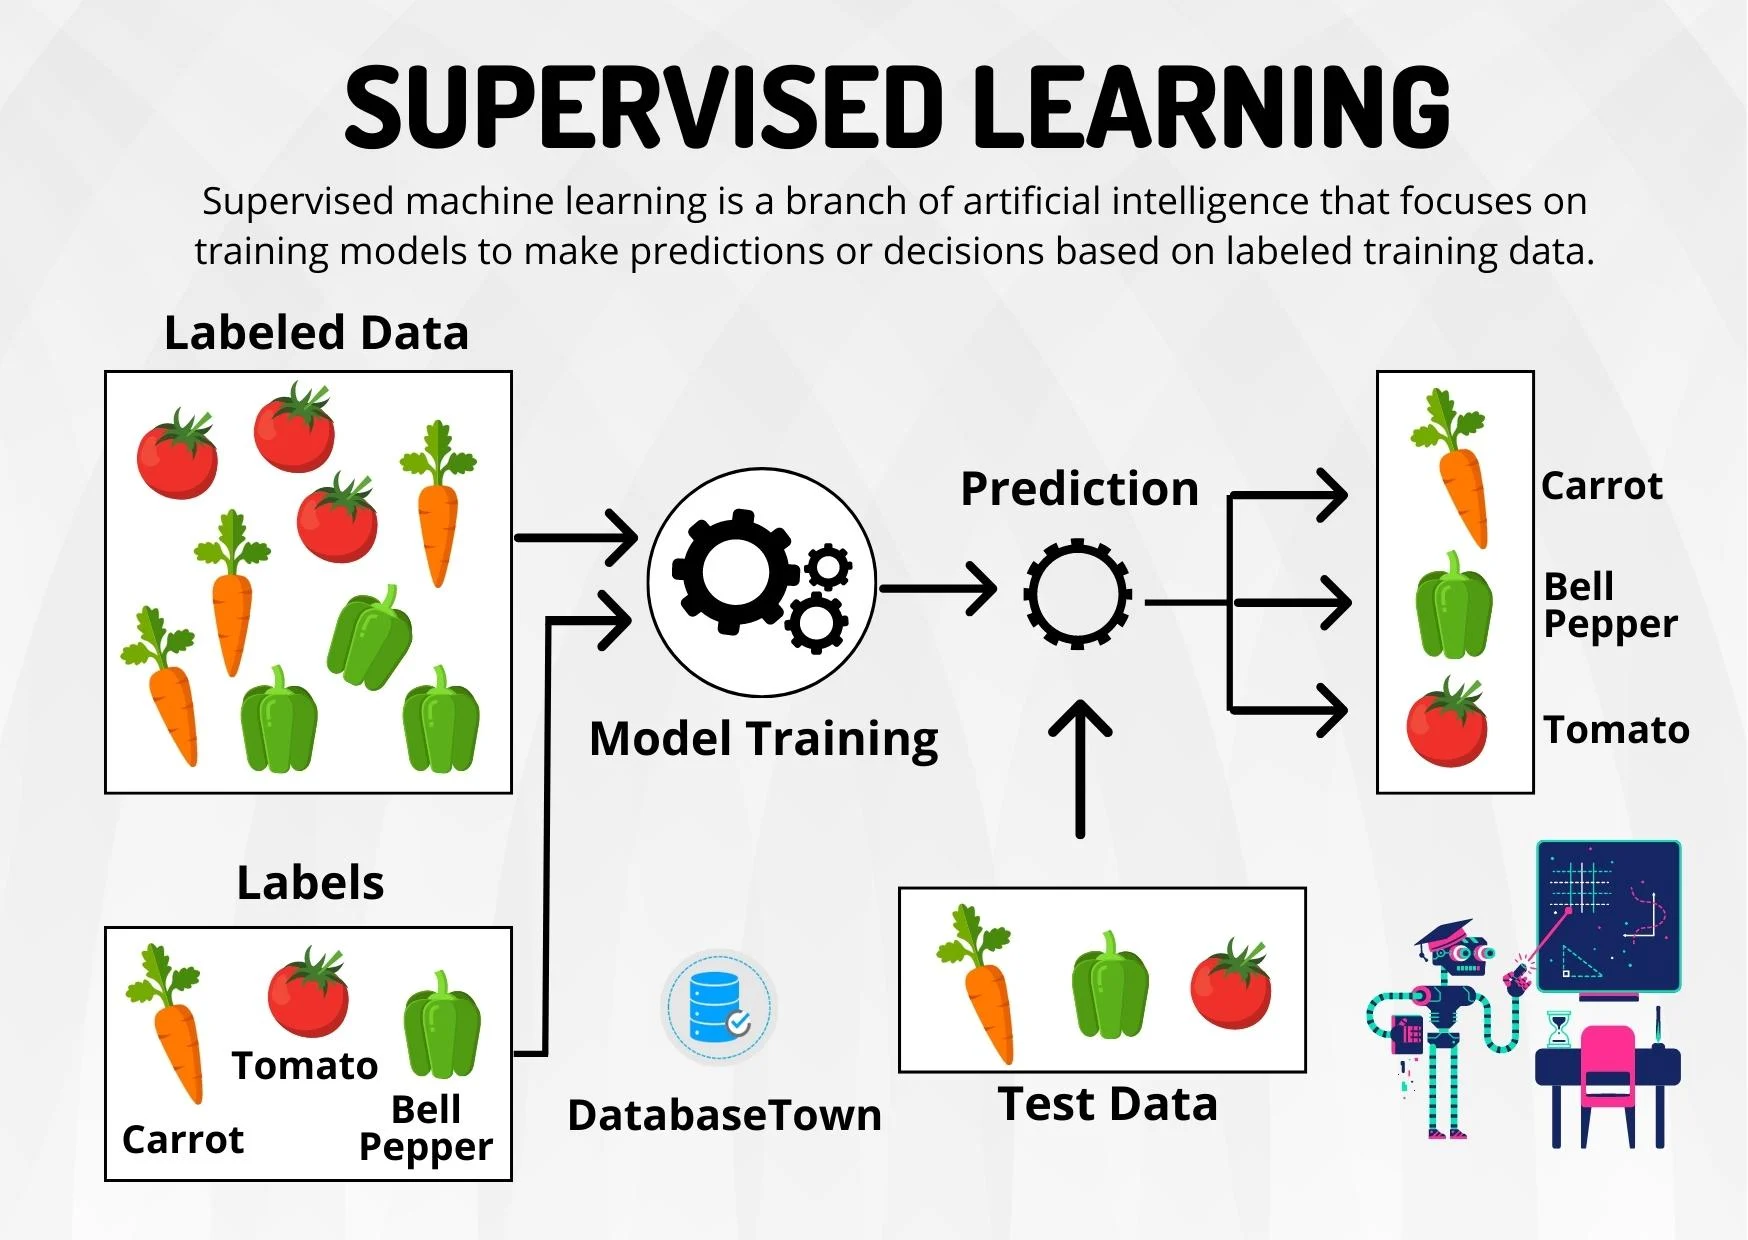

#### Model Regresi Linear atau Non-linear?

Regresi Linear merupakan model yang mengasumsikan hubungan linier(seperti garis lurus) antara variabel independen dan variabel dependen. Pada umumnya Regresi linear digunakan untuk variabel prediksi(target) yang bersifat numerik

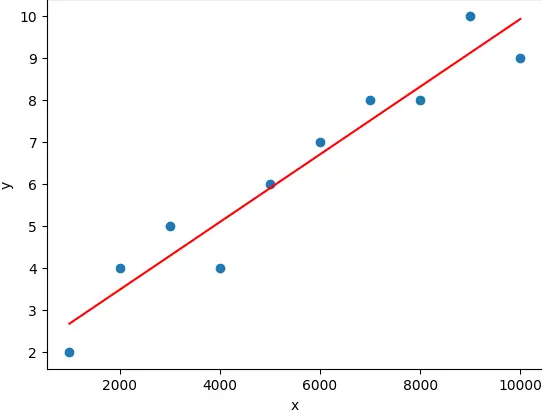

Regresi non-linear adalah model yang mengasumsikan hubungan tidak linier antara variabel independen dan variabel dependen.

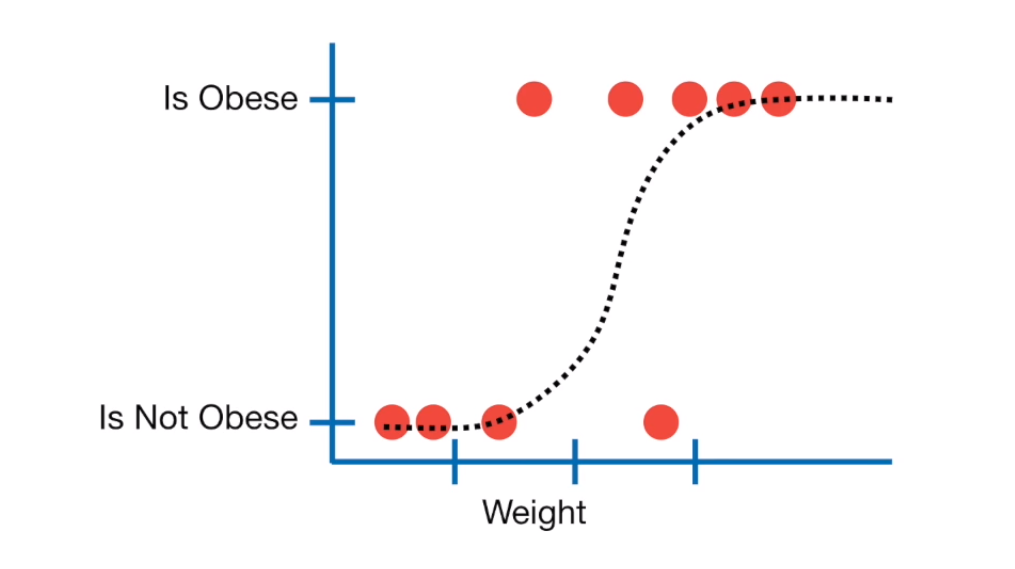

Karena variabel target pada data penyakit jantung merupakan data yang bersifat nominal yaitu 0 dan 1. Dapat disimpulkan plot yang dihasilkan tidak akan berupa garis lurus(tidak linear), sehingga saya memutuskan untuk memilih model Non-Linear pada data tersebut seperti KNN, Random Forest, Logistic Regression, dll

### 3
Peserta dapat melakukan eksekusi coding machine learning model yang telah ditentukan pada poin 1 dengan tepat sesuai urutan yang tepat.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score

#### KNN

In [ ]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_train, y_train)

0.8566176470588235

In [ ]:
knn.score(X_train, y_train)

pred_knn = knn.predict(X_test)

In [ ]:
accuracy_score(y_test, pred_knn)

0.8088235294117647

In [ ]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.70      0.80        37
           1       0.72      0.94      0.82        31

    accuracy                           0.81        68
   macro avg       0.83      0.82      0.81        68
weighted avg       0.84      0.81      0.81        68



#### RandomForrest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
pred_rf = rf.predict(X_test)
accuracy_score(y_test, pred_rf)

0.8823529411764706

In [ ]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89        37
           1       0.85      0.90      0.88        31

    accuracy                           0.88        68
   macro avg       0.88      0.88      0.88        68
weighted avg       0.88      0.88      0.88        68



#### Logistic Regression

In [ ]:
# Logistik Regression
lg = LogisticRegression()

lg.fit(X_train, y_train)
pred_lg = lg.predict(X_test)
accuracy_score(y_test, pred_lg)

0.7941176470588235

In [ ]:
print(classification_report(y_test, pred_lg))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80        37
           1       0.74      0.84      0.79        31

    accuracy                           0.79        68
   macro avg       0.80      0.80      0.79        68
weighted avg       0.80      0.79      0.79        68



#### Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Inisialisasi model Naive Bayes
nb = GaussianNB()

# Melatih model Naive Bayes menggunakan data latih
nb.fit(X_train, y_train)
pred_nb = nb.predict(X_test)
accuracy_score(y_test, pred_nb)


0.7794117647058824

In [ ]:
print(classification_report(y_test, pred_nb))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        37
           1       0.75      0.77      0.76        31

    accuracy                           0.78        68
   macro avg       0.78      0.78      0.78        68
weighted avg       0.78      0.78      0.78        68



#### Support Vector Machines

In [ ]:
from sklearn.svm import SVC

# Inisialisasi model Naive Bayes dengan distribusi Multinomial
svc = SVC()

# Melatih model Naive Bayes menggunakan data latih
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
accuracy_score(y_test, pred_svc)

0.8235294117647058

In [ ]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.96      0.70      0.81        37
           1       0.73      0.97      0.83        31

    accuracy                           0.82        68
   macro avg       0.85      0.84      0.82        68
weighted avg       0.86      0.82      0.82        68



In [ ]:
acc_knn = accuracy_score(y_test, pred_knn)
acc_rf = accuracy_score(y_test, pred_rf)
acc_lg = accuracy_score(y_test, pred_lg)
acc_nb = accuracy_score(y_test, pred_nb)
acc_svc = accuracy_score(y_test, pred_svc)

prc_knn = precision_score(y_test, pred_knn)
prc_rf = precision_score(y_test, pred_rf)
prc_lg = precision_score(y_test, pred_lg)
prc_nb = precision_score(y_test, pred_nb)
prc_svc = precision_score(y_test, pred_svc)

rec_knn = recall_score(y_test, pred_knn)
rec_rf = recall_score(y_test, pred_rf)
rec_lg = recall_score(y_test, pred_lg)
rec_nb = recall_score(y_test, pred_nb)
rec_svc = recall_score(y_test, pred_svc)

f1_knn = f1_score(y_test, pred_knn)
f1_rf = f1_score(y_test, pred_rf)
f1_lg = f1_score(y_test, pred_lg)
f1_nb = f1_score(y_test, pred_nb)
f1_svc = f1_score(y_test, pred_svc)



#### Kesimpulan

In [ ]:
model_df = pd.DataFrame({
    "name_model":['KNN','RandomForest', 'Logistic Regression','Naive Bayes' ,'Support Vector Machine'],
    "acc":[acc_knn, acc_rf,acc_lg,acc_nb,acc_svc],
    "precision":[prc_knn, prc_rf,prc_lg,prc_nb,prc_svc],
    "recall":[rec_knn, rec_rf, rec_lg, rec_nb, rec_svc ],
    "f1":[f1_knn, f1_rf, f1_lg, f1_nb, f1_svc]
})
model_df_sorted = model_df.sort_values(by='acc', ascending=False)
model_df_sorted

,name_model,acc,precision,recall,f1
1,RandomForest,0.882353,0.848485,0.903226,0.875000
4,Support Vector Machine,0.823529,0.731707,0.967742,0.833333
0,KNN,0.808824,0.725000,0.935484,0.816901
2,Logistic Regression,0.794118,0.742857,0.838710,0.787879
3,Naive Bayes,0.779412,0.750000,0.774194,0.761905


### 4
Peserta mampu menerapkan cross-validation basic dari machine learning model yang telah dibuat sebelumnya.

#### K-Fold

Menjalankan cross-validation menggunakan K-Fold

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

def model_cross_validation(models, X, y, selected_features, n_splits=5):
    k_folds = KFold(n_splits=n_splits)

    scores = {}
    for model_name, model in models.items():
        model_scores = cross_val_score(model, X[selected_features], y, cv=k_folds)
        scores[model_name] = model_scores
    return scores

# Dictionary models
models = {
    'Random Forest': rf,
    'K-Nearest Neighbors': knn,
    'Logistic Regression': lg,
    'GaussianNB': nb,
    'Support Vector Machine': svc
}

# Penerapan fungsi dengan cross validation yang di mana variabel yang diambil merupakan yang terpilih
cross_val_scores = model_cross_validation(models, x_1, y_1, selected_features)

# Membuat DataFrame dari hasil cross validation scores
cross_val_df = pd.DataFrame(cross_val_scores)

mean_accuracy = cross_val_df.mean()
# Membuat DataFrame
data_cross_val = pd.DataFrame({'Model': mean_accuracy.index, 'Mean Accuracy': mean_accuracy.values})
data_cross_val_sorted = data_cross_val.sort_values(by="Mean Accuracy", ascending=False)

data_cross_val_sorted

,Model,Mean Accuracy
4,Support Vector Machine,0.835294
2,Logistic Regression,0.820588
3,GaussianNB,0.814706
1,K-Nearest Neighbors,0.808824
0,Random Forest,0.794118


### 5
Peserta dapat menjelaskan hasil dari cross-validation basic yang telah dihasilkan sebelumnya pada poin 4.

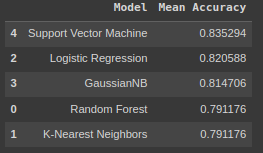
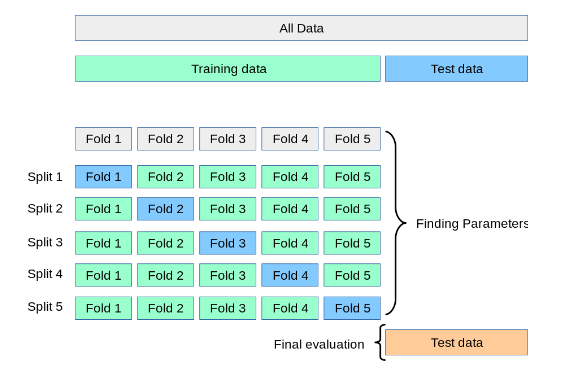

Cross-validasi adalah teknik untuk mengevaluasi model ML-dengan melatih beberapa model ML-subset dari data input yang tersedia dan mengevaluasi mereka pada subset pelengkap data. Gunakan cross-validasi untuk mendeteksi overfitting, yaitu, gagal untuk menggeneralisasi pola. \

Berikut merupakan hasil dari Cross-Validation dari setiap Model. Nilai akurasi yang diambil merupakan nilai rata-rata dari pembagian 5 bagian untuk data test cross validation. Seperti yang terlihat dalam tabel jika Accuracy terbaik ada pada model Support Vector Machine sebesar 83% dan disusul oleh model Logistic Regression sebesar 82%.



### 6
Peserta mampu menerapkan learning curves dari machine learning model yang telah dibuat sebelumnya serta membuat visualisasi hasil dari learning curves yang dihasilkan.

Berikut merupakan learning curve hasil model yang belum mengalami cross validation

Plotting learning curve for Random Forest
Plotting learning curve for K-Nearest Neighbors
Plotting learning curve for Logistic Regression
Plotting learning curve for GaussianNB
Plotting learning curve for Support Vector Machine


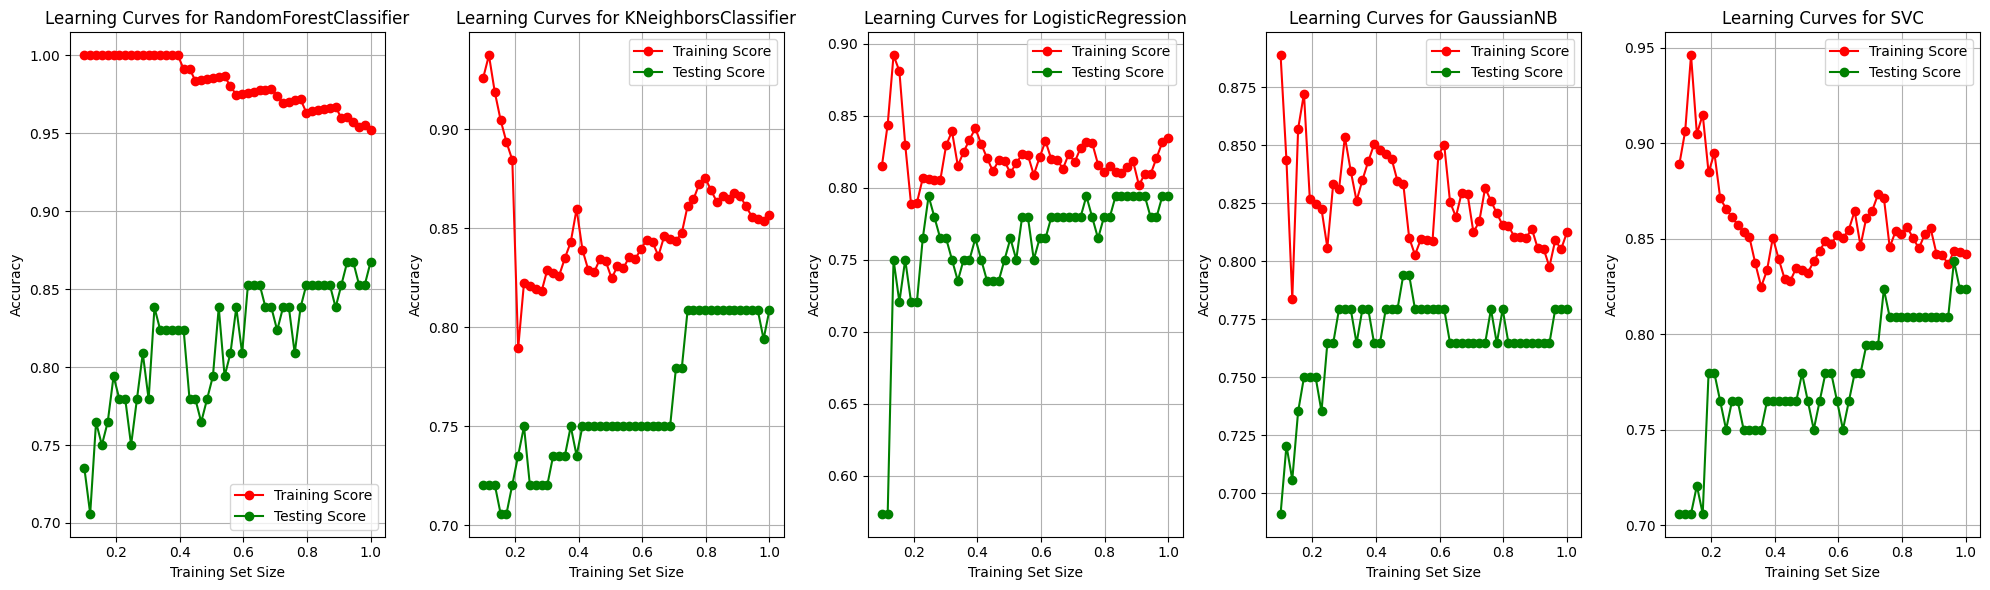

In [ ]:
def plot_learning_curve(model, X_train, y_train, X_test, y_test, ax):
    train_sizes = np.linspace(0.1, 1, 50)
    learning_curve_train = []
    learning_curve_test = []

    for train_size in train_sizes:
        num_samples = int(train_size * len(X_train))
        X_subset = X_train[:num_samples]
        y_subset = y_train[:num_samples]

        model.fit(X_subset, y_subset)

        y_pred_train = model.predict(X_subset)
        acc_train = accuracy_score(y_subset, y_pred_train)
        learning_curve_train.append(acc_train)

        y_pred_test = model.predict(X_test)
        acc_test = accuracy_score(y_test, y_pred_test)
        learning_curve_test.append(acc_test)

    # Plot Learning Curve
    ax.plot(train_sizes, learning_curve_train, 'o-', color='r', label="Training Score")
    ax.plot(train_sizes, learning_curve_test, 'o-', color='g', label="Testing Score")
    ax.set_title(f"Learning Curves for {type(model).__name__}")
    ax.set_xlabel("Training Set Size")
    ax.set_ylabel("Accuracy")
    ax.grid()
    ax.legend(loc='best')

# Plot learning curve for each model
fig, axes = plt.subplots(1, len(models), figsize=(20, 6))

for i, (model_name, model) in enumerate(models.items()):
    print(f"Plotting learning curve for {model_name}")
    plot_learning_curve(model, X_train, y_train, X_test, y_test, axes[i])

plt.tight_layout()
plt.show()

Plotting learning curve for Random Forest
Plotting learning curve for K-Nearest Neighbors
Plotting learning curve for Logistic Regression
Plotting learning curve for GaussianNB
Plotting learning curve for Support Vector Machine


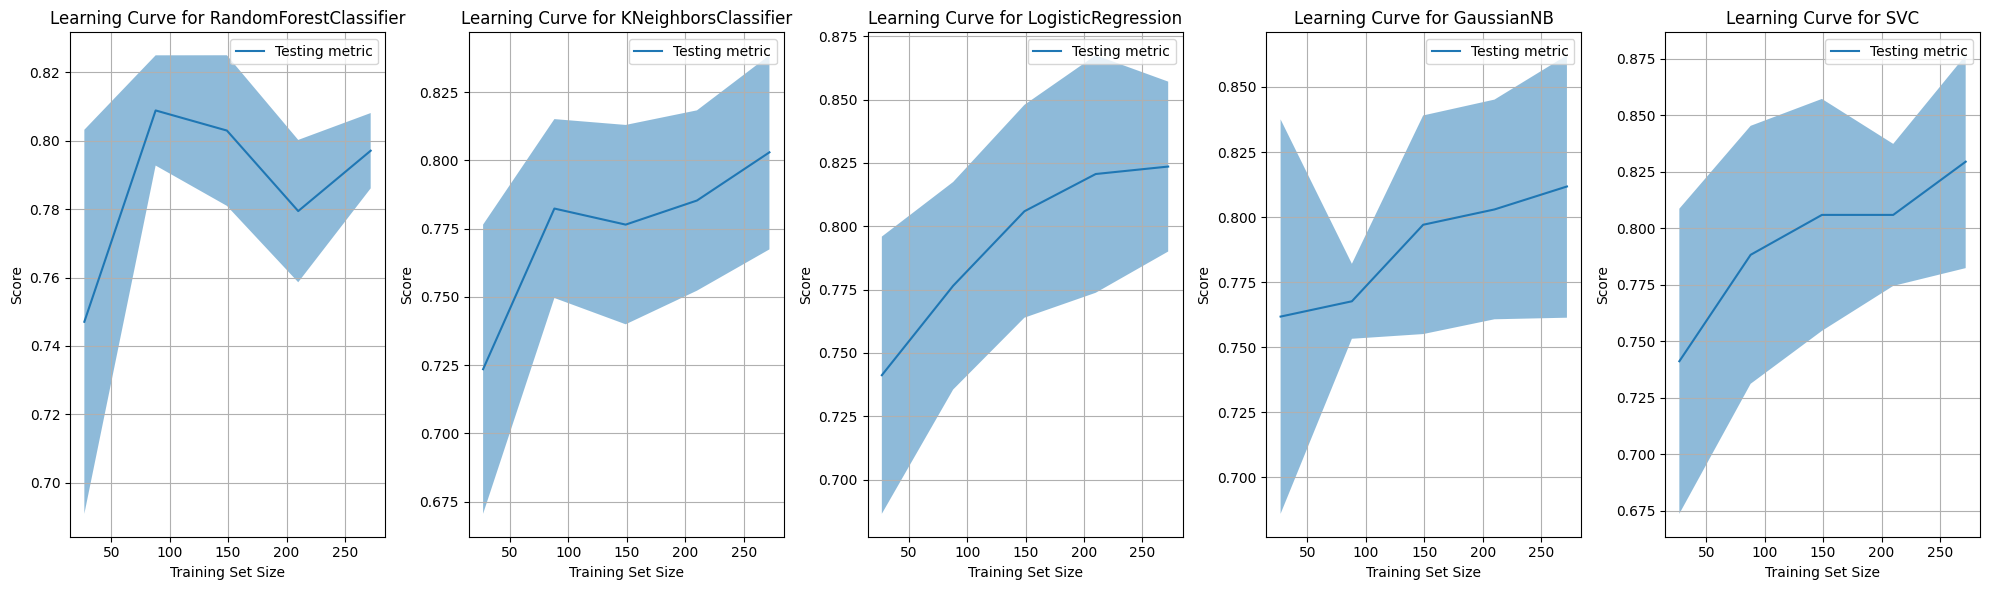

In [ ]:
from sklearn.model_selection import LearningCurveDisplay, learning_curve
def plot_learning_curve(model, X, y, ax):
    train_sizes, train_scores, test_scores = learning_curve(
        model, x_1[selected_features], y_1, cv=5)

    display = LearningCurveDisplay(train_sizes=train_sizes,
                                   train_scores=train_scores,
                                   test_scores=test_scores,
                                   score_name="Score")
    display.plot(ax=ax)
    ax.set_title(f"Learning Curve for {type(model).__name__}")
    ax.set_xlabel("Training Set Size")
    ax.set_ylabel("Score")
    ax.grid()

# Assuming you have defined X_train, y_train, and models (Random Forest, K-NN, Logistic Regression, GaussianNB, Support Vector Machine)

fig, axes = plt.subplots(1, len(models), figsize=(20, 6))

for i, (model_name, model) in enumerate(models.items()):
    print(f"Plotting learning curve for {model_name}")
    plot_learning_curve(model, X_train, y_train, axes[i])

plt.tight_layout()
plt.show()

Kurva yang seharusnya ditampilkan sebagai berikut :
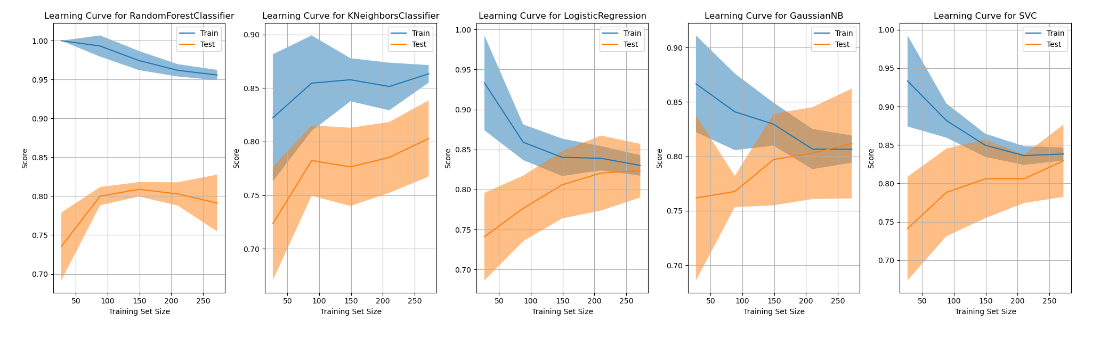

### 7
Peserta dapat menjelaskan hasil dari visualisasi learning curves yang telah dihasilkan sebelumnya pada poin 6.

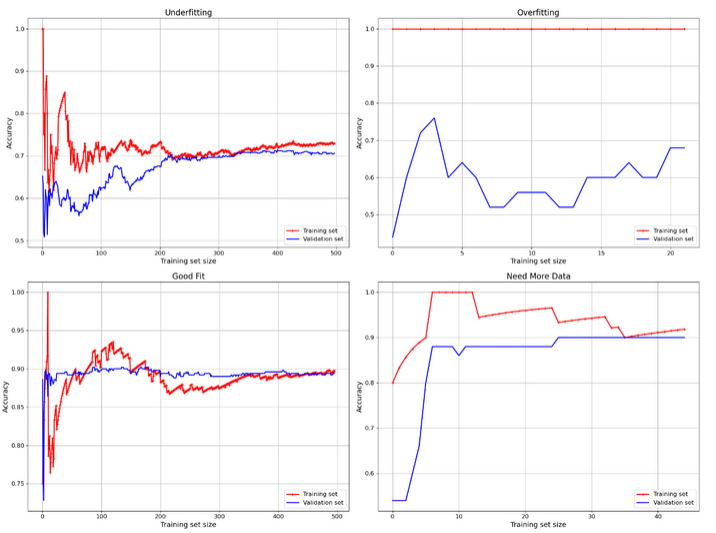

Berikut merupakan contoh dari Learning Curve yang di mana ada kurva yang mengalami ⁉
- Underfit : Terjadi apabila hasil dari kurva mengalami penurunan akurasi atau akurasi yang didapat bernilai rendah
- Overfit : Terjadi apabila adanya jarak yang cukup jauh antara data training dan data testing(seperti yang terlihat dalam learning curve Random Forest Clasifier)
- Good fit : menggambarkan model yang mencapai keseimbangan yang diinginkan antara belajar dari data pelatihan dan menggeneralisasi dengan baik untuk data yang tidak terlihat, memiliki akurasi yang tinggi, serta jarak di antara data training dan testing tidak terlalu jauh( seperti learning curve KNN, Logistic Regression, GaussianNB, dan SVC )

### 8
**Peserta** mampu memperbaiki akurasi machine learning modul yang telah dibuat menggunakan hyperparameter tuning dan juga bootstrapping, jika ada.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grids = {
    'Random Forest': {
        "n_estimators":[10,50,100,150,200],
        "criterion":["gini", "entropy", "log_loss"],
        'max_depth': [None, 10, 20]
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'saga']
    },
    'GaussianNB': {},
    'Support Vector Machine': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
    }
}

# Perform GridSearchCV for each model
best_estimators = {}
for model_name, estimator in models.items():
    if model_name in param_grids:
        param_grid = param_grids[model_name]
        grid_search = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_estimators[model_name] = grid_search.best_estimator_
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
        print(f"Best accuracy for {model_name}: {grid_search.best_score_}", "\n")
    else:
        best_estimators[model_name] = estimator



Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 50}
Best accuracy for Random Forest: 0.7976430976430977 

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for K-Nearest Neighbors: {'n_neighbors': 3, 'weights': 'uniform'}
Best accuracy for K-Nearest Neighbors: 0.7906397306397307 

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Best accuracy for Logistic Regression: 0.8454545454545455 

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for GaussianNB: {}
Best accuracy for GaussianNB: 0.8123905723905723 

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for Support Vector Machine: {'C': 1, 'kernel': 'linear'}
Best accuracy for Support Vector Machine: 0.8345454545454546 



### 9
Peserta dapat mengukur model yang dibuat dengan metric evaluation yang sesuai dengan machine learning model yang telah dibuat sebelumnya dan yang terbaik untuk menyelesaikan masalah.

#### Accuracy Score dan Zero_one_loss

Zero_one_loss(Kerugian nol-satu):

Fungsi kerugian yang paling sederhana adalah kerugian nol-satu. Ini benar-benar menghitung berapa banyak kesalahan yang dilakukan fungsi hipotesis h pada set pelatihan. Untuk setiap contoh, ia mengalami kerugian sebesar 1 jika salah prediksi, dan 0 jika tidak. Kerugian nol-satu yang dinormalisasi mengembalikan sebagian kecil sampel pelatihan yang salah klasifikasi, yang juga sering disebut sebagai kesalahan pelatihan. Kerugian nol-satu sering digunakan untuk mengevaluasi pengklasifikasi dalam pengaturan klasifikasi kelas jamak/biner tetapi jarang berguna untuk memandu prosedur optimasi karena fungsinya tidak dapat dibedakan dan tidak kontinu. Secara formal, kerugian nol-satu dapat dinyatakan mempunyai:

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, zero_one_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Inisialisasi model-model yang ingin dievaluasi
best_models = {
    'Random Forest Classifier': RandomForestClassifier(criterion='entropy', max_depth=None, n_estimators=100),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=3, weights='uniform'),
    'Logistic Regression': LogisticRegression(C=10, solver='saga'),
    'Gaussian Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(C=10, kernel='linear')
}

#Variabel yang akan diisi
hasil = []

# Evaluasi setiap model
for model_name, model in models.items():
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    loss = zero_one_loss(y_test, predictions)

    hasil.append({'Model': model_name, 'Accuracy': accuracy, 'Zero-One Loss': loss})

hasil_df = pd.DataFrame(results)

# Menampilkan DataFrame
hasil_df

,Model,Accuracy,Zero-One Loss
0,Random Forest Classifier,0.867647,0.132353
1,K-Nearest Neighbors Classifier,0.882353,0.117647
2,Logistic Regression Classifier,0.794118,0.205882
3,Gaussian Naive Bayes Classifier,0.779412,0.220588
4,Support Vector Machine Classifier,0.779412,0.220588


Seperti yang dapat dilihat jika nilai pada Zero-One Loss memiliki nilai mendekati 0 yang artinya hanya sedikit kesalahan pelatihan yang terjadi pada model tersebut

Accuracy for Random Forest Classifier: 0.87
Accuracy for K-Nearest Neighbors: 0.88
Accuracy for Logistic Regression: 0.79
Accuracy for Gaussian Naive Bayes: 0.78
Accuracy for Support Vector Machine: 0.78


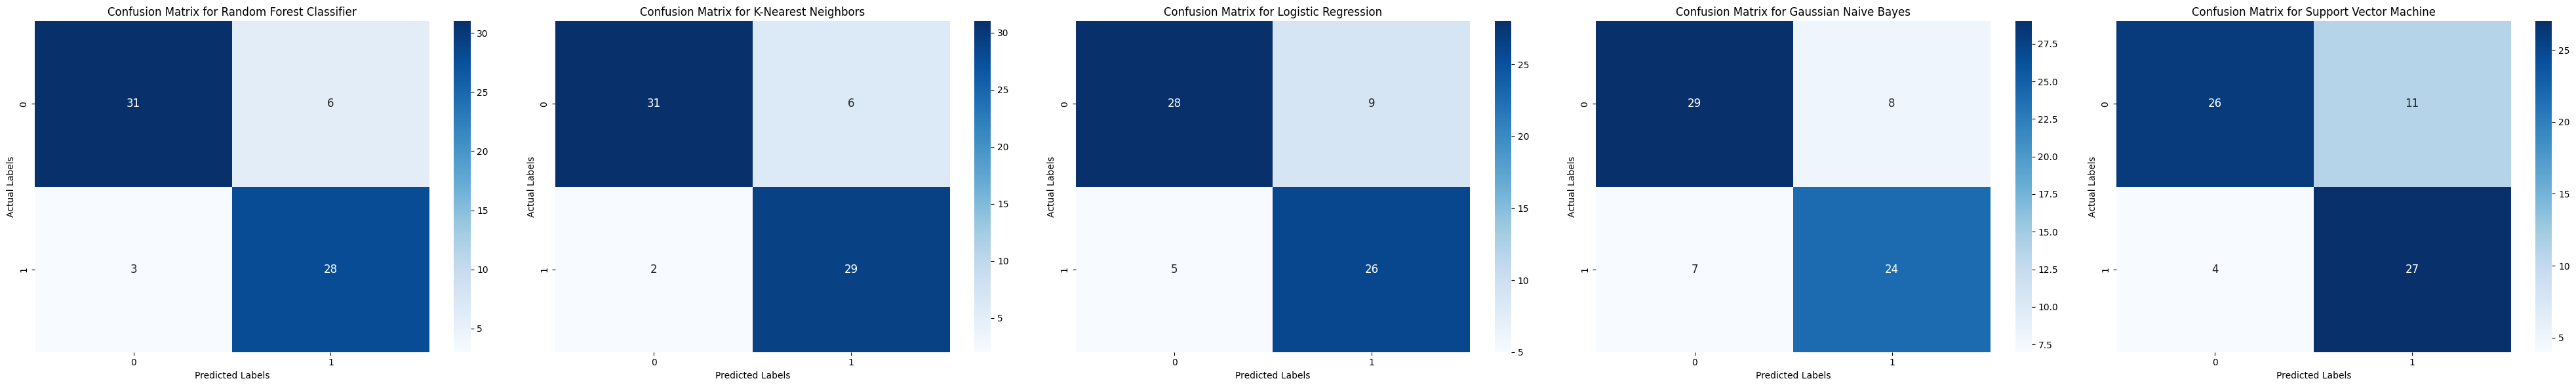

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

best_models = {
    'Random Forest Classifier': RandomForestClassifier(criterion='entropy', max_depth=None, n_estimators=100),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=3, weights='uniform'),
    'Logistic Regression': LogisticRegression(C=10, solver='saga'),
    'Gaussian Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(C=10, kernel='linear')
}

# Calculate the number of rows and columns for subplots
num_rows = 1
num_cols = 5

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 8, 6))


for i, (model_name, model) in enumerate(best_models.items()):
    # Membuat fit pada setiap model untuk membuat variabel prediksi
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Menghitung nilai akurasi pada setiap model
    accuracy = accuracy_score(y_test, predictions)

    # Membuat confusion matrix
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 12}, ax=axes[i])

    axes[i].set_xlabel("Predicted Labels")
    axes[i].set_ylabel("Actual Labels")
    axes[i].set_title(f"Confusion Matrix for {model_name}")
    print(f"Accuracy for {model_name}: {accuracy:.2f}")
plt.tight_layout()
plt.show()


Berikut ini merupakan hasil dari Confusion metrix untuk melihat nilai prediksi pada setiap model. Pada model tersebut hanya KKN dan disusul oleh random forest yang mengalami paling sedikit kesalahan

### 10
Peserta dapat memberikan interpretasi dari hasil metric evaluation serta alasan pemilihan metric yang dipilih pada poin 9.

Plotting learning curve for Random Forest Classifier
Plotting learning curve for K-Nearest Neighbors Classifier
Plotting learning curve for Logistic Regression Classifier


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Plotting learning curve for Gaussian Naive Bayes Classifier
Plotting learning curve for Support Vector Machine Classifier


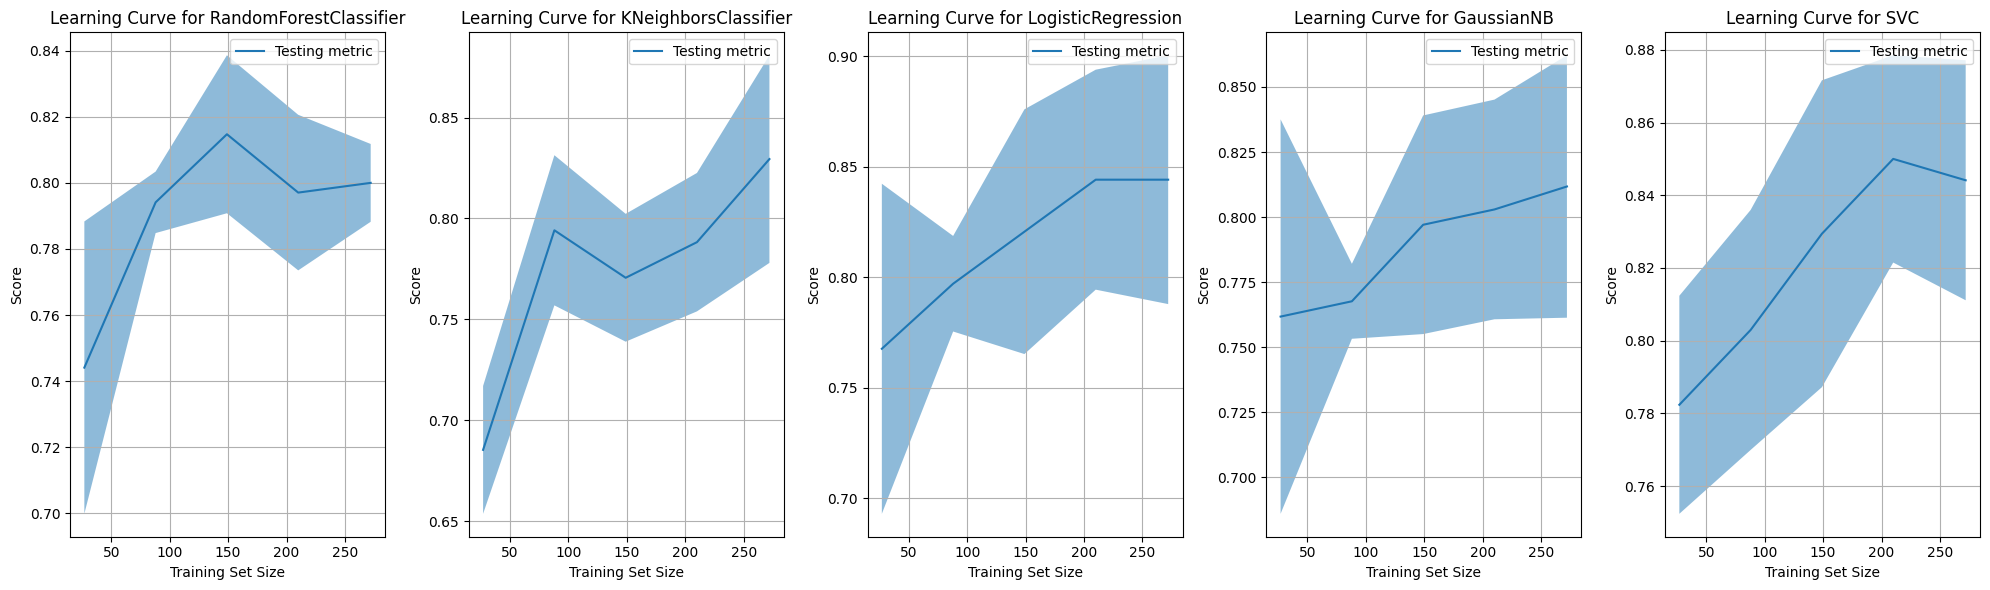

In [ ]:
#Fngsi untuk memanggil learning curve pada model yang telah diperbaiki
def plot_learning_curve(model, X, y, ax):
    train_sizes, train_scores, test_scores = learning_curve(
        model, x_1[selected_features], y_1, cv=5)

    display = LearningCurveDisplay(train_sizes=train_sizes,
                                   train_scores=train_scores,
                                   test_scores=test_scores,
                                   score_name="Score")
    display.plot(ax=ax)
    ax.set_title(f"Learning Curve for {type(model).__name__}")
    ax.set_xlabel("Training Set Size")
    ax.set_ylabel("Score")
    ax.grid()

# Assuming you have defined X_train, y_train, and models (Random Forest, K-NN, Logistic Regression, GaussianNB, Support Vector Machine)

fig, axes = plt.subplots(1, len(models), figsize=(20, 6))

for i, (model_name, model) in enumerate(best_models.items()):
    print(f"Plotting learning curve for {model_name}")
    plot_learning_curve(model, X_train, y_train, axes[i])

plt.tight_layout()
plt.show()

Gambar yang seharusnya ditampilkan seperti berikut, terlihat jika model pada KNN sudah lebih baik dari sebelumnya begitu juga dengan logistic regression, GausianNB, serta SVC. Namun, pada RandomForest terlihat masih terdapat overfit.

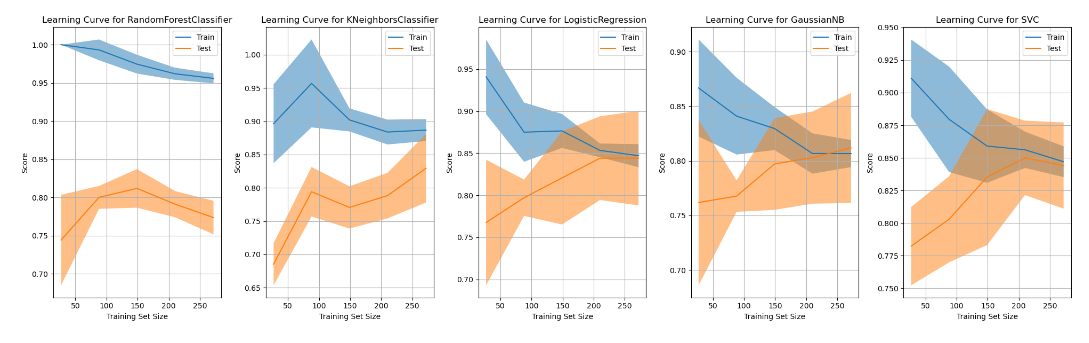

In [ ]:
data_cross_val['Setelah'] = [0.87,0.88,0.79,0.78,0.78]
data_cross_val_sort = data_cross_val.sort_values(by="Setelah", ascending=False)
data_cross_val_sort

,Model,Mean Accuracy,Setelah
1,K-Nearest Neighbors,0.808824,0.88
0,Random Forest,0.794118,0.87
2,Logistic Regression,0.820588,0.79
3,GaussianNB,0.814706,0.78
4,Support Vector Machine,0.835294,0.78


Metrik evaluasi adalah ukuran kuantitatif yang digunakan untuk menilai kinerja dan efektivitas model statistik atau pembelajaran mesin. Metrik ini memberikan wawasan tentang seberapa baik kinerja model dan membantu dalam membandingkan model atau algoritma yang berbeda. Dari model tersebut terlihat bahwa KNN meruupakan model terbaik dengan nilai akurasi 0.88 setelah dilakukan hyperparameter. Dan kemudian disusul dengan model Random Forest,namun hasil yang didapat dari learning curve masih mengalami overfit. Ada baiknya hasil terbaik dari model tersebut adalah menggunaka KNN.

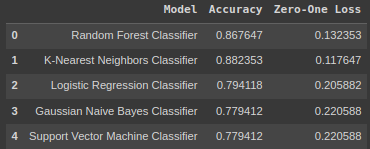

Begitu juga dengan hasil Matrix Zero-One Loss yang di mana model KNN melakukan lebih sedikit kesalahan yaitu 0,11(Lebih mendekati 0)